# Notebook to find Doublets using scrublet and Demultiplex multinucleated data using `HashSolo`

**Created by :** Srivalli Kolla

**Created on :** 20 March, 2025

**Modified on :** 28 March, 2025

**University of Würzburg**

Env : scanpy (Python 3.12.2)

# Importing Packages

In [1]:
import scanpy as sc
import pandas as pd
import datetime
import os
import scrublet as scr
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()

plt.rcParams['figure.dpi'] = 300  
plt.rcParams['savefig.dpi'] = 300
plt.vlines

timestamp = datetime.datetime.now().strftime("%d_%m_%y")

-----
anndata     0.11.3
scanpy      1.10.4
-----
Cython              3.0.12
PIL                 11.1.0
asttokens           NA
charset_normalizer  3.4.1
colorama            0.4.6
comm                0.2.2
cycler              0.12.1
cython              3.0.12
cython_runtime      NA
dateutil            2.9.0.post0
debugpy             1.8.12
decorator           5.2.1
executing           2.1.0
h5py                3.13.0
igraph              0.11.8
ipykernel           6.29.5
jedi                0.19.2
joblib              1.4.2
kiwisolver          1.4.7
legacy_api_wrap     NA
leidenalg           0.10.2
llvmlite            0.44.0
matplotlib          3.10.1
mpl_toolkits        NA
natsort             8.4.0
numba               0.61.0
numpy               2.1.3
packaging           24.2
pandas              2.2.3
parso               0.8.4
patsy               1.0.1
platformdirs        4.3.6
prompt_toolkit      3.0.50
psutil              7.0.0
pure_eval           0.2.3
pydev_ipython       NA
pydevconso

# Importing files

In [3]:
raw_adata = sc.read_10x_mtx('../data/filtered_feature_bc_matrix', cache = True, gex_only= False)
raw_adata

... reading from cache file cache/..-data-filtered_feature_bc_matrix-matrix.h5ad


AnnData object with n_obs × n_vars = 41918 × 32293
    var: 'gene_ids', 'feature_types'

In [4]:
raw_adata.obs

""
AAACCAAAGCCAGTGT-1
AAACCAAAGGCGTCCA-1
AAACCAAAGGTTAGCC-1
AAACCAAAGGTTAGTT-1
AAACCAAAGTACCACA-1
...
TGTGTTGAGCCTATCT-1
TGTGTTGAGCTAACCA-1
TGTGTTGAGGAGGACC-1
TGTGTTGAGTACGCAC-1


In [5]:
raw_adata.var

,gene_ids,feature_types
Xkr4,ENSMUSG00000051951,Gene Expression
Gm1992,ENSMUSG00000089699,Gene Expression
Gm19938,ENSMUSG00000102331,Gene Expression
Gm37381,ENSMUSG00000102343,Gene Expression
Rp1,ENSMUSG00000025900,Gene Expression
...,...,...
TotalSeqB5,Hash5,Antibody Capture
TotalSeqB6,Hash6,Antibody Capture
TotalSeqB7,Hash7,Antibody Capture
TotalSeqB8,Hash8,Antibody Capture


In [6]:
raw_adata.var['feature_types'].unique()

array(['Gene Expression', 'Antibody Capture'], dtype=object)

# Hashtag check

1. Extract features
2. Extract Hashtags from features

In [7]:
features = raw_adata.var[['gene_ids', 'feature_types']].copy()

hashtag_features = features.loc[features["feature_types"] == "Antibody Capture"].index.tolist()
hashtag_features

['TotalSeqB1',
 'TotalSeqB3',
 'TotalSeqB4',
 'TotalSeqB5',
 'TotalSeqB6',
 'TotalSeqB7',
 'TotalSeqB8',
 'TotalSeqB9']

In [8]:
raw_adata.var_names_make_unique()

1. Subset the AnnData object to only hashtag counts
2. Convert to a pandas DataFrame
3. Check the head

In [9]:
raw_adata_hto = raw_adata[:, hashtag_features].copy()

hto_counts = pd.DataFrame(
    raw_adata_hto.X.toarray(),  # Convert the sparse matrix to a dense matrix
    index=raw_adata_hto.obs.index,  # Use the cell barcodes as index
    columns=hashtag_features  # Use the extracted hashtag feature names
)

hto_counts.head()

,TotalSeqB1,TotalSeqB3,TotalSeqB4,TotalSeqB5,TotalSeqB6,TotalSeqB7,TotalSeqB8,TotalSeqB9
AAACCAAAGCCAGTGT-1,168.0,422.0,401.0,115.0,181.0,124.0,214.0,335.0
AAACCAAAGGCGTCCA-1,196.0,486.0,238.0,145.0,210.0,155.0,255.0,243.0
AAACCAAAGGTTAGCC-1,185.0,615.0,113.0,158.0,236.0,122.0,243.0,189.0
AAACCAAAGGTTAGTT-1,153.0,415.0,95.0,248.0,221.0,128.0,211.0,187.0
AAACCAAAGTACCACA-1,181.0,433.0,89.0,132.0,207.0,175.0,231.0,207.0


Assign each cell to the hashtag with the highest count and look at the head

In [10]:
hto_counts["Assigned_Hashtag"] = hto_counts.idxmax(axis=1)
hto_counts.head(10)

,TotalSeqB1,TotalSeqB3,TotalSeqB4,TotalSeqB5,TotalSeqB6,TotalSeqB7,TotalSeqB8,TotalSeqB9,Assigned_Hashtag
AAACCAAAGCCAGTGT-1,168.0,422.0,401.0,115.0,181.0,124.0,214.0,335.0,TotalSeqB3
AAACCAAAGGCGTCCA-1,196.0,486.0,238.0,145.0,210.0,155.0,255.0,243.0,TotalSeqB3
AAACCAAAGGTTAGCC-1,185.0,615.0,113.0,158.0,236.0,122.0,243.0,189.0,TotalSeqB3
AAACCAAAGGTTAGTT-1,153.0,415.0,95.0,248.0,221.0,128.0,211.0,187.0,TotalSeqB3
AAACCAAAGTACCACA-1,181.0,433.0,89.0,132.0,207.0,175.0,231.0,207.0,TotalSeqB3
AAACCAAAGTAGCCGT-1,227.0,441.0,154.0,120.0,194.0,123.0,228.0,189.0,TotalSeqB3
AAACCAAAGTAGGCAG-1,167.0,377.0,72.0,227.0,192.0,123.0,228.0,190.0,TotalSeqB3
AAACCAAAGTCATGGC-1,142.0,525.0,89.0,121.0,539.0,152.0,272.0,204.0,TotalSeqB6
AAACCAAAGTCGAAGG-1,196.0,722.0,166.0,396.0,232.0,190.0,354.0,268.0,TotalSeqB3
AAACCAAAGTTAGGCC-1,191.0,527.0,362.0,150.0,251.0,161.0,286.0,248.0,TotalSeqB3


Saving the final assigned hashtag as obs and total hashtag counts as obsm

In [11]:
hto_counts = hto_counts.apply(pd.to_numeric, errors="coerce")
raw_adata.obs["assigned_hashtag"] = hto_counts.idxmax(axis=1)
raw_adata.obsm["hto_counts"] = hto_counts
raw_adata

AnnData object with n_obs × n_vars = 41918 × 32293
    obs: 'assigned_hashtag'
    var: 'gene_ids', 'feature_types'
    obsm: 'hto_counts'

In [12]:
raw_adata.obs['assigned_hashtag'] = raw_adata.obs['assigned_hashtag'].str.replace('TotalSeqB', 'Hash')
raw_adata.obs

,assigned_hashtag
AAACCAAAGCCAGTGT-1,Hash3
AAACCAAAGGCGTCCA-1,Hash3
AAACCAAAGGTTAGCC-1,Hash3
AAACCAAAGGTTAGTT-1,Hash3
AAACCAAAGTACCACA-1,Hash3
...,...
TGTGTTGAGCCTATCT-1,Hash3
TGTGTTGAGCTAACCA-1,Hash4
TGTGTTGAGGAGGACC-1,Hash3
TGTGTTGAGTACGCAC-1,Hash3


# Adding meta_data

In [13]:
meta_data = pd.read_csv('../data/Nuclei_hashing_metadata.csv', sep = ';')
meta_data

,Sample,Sample-ID,Mouse-ID,Sex,Group,Ref hashtag,Nuclei Purification Method after Hashing,assigned_hashtag
0,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_10,10,24-2455,Male,MCMV,TotalSeqB1,Standard,Hash1
1,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_11,11,26-2457,Male,MCMV,TotalSeqB9,Standard,Hash9
2,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,Hash3
3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13,13,#5_DZHI_12.07.2023,Male,MCMV,TotalSeqB4,Magnetic Beads,Hash4
4,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_14,14,9_4893,Female,noninf,TotalSeqB5,Magnetic Beads,Hash5
5,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_15,15,2_1219,Female,noninf,TotalSeqB6,Standard,Hash6
6,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads,Hash7
7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_17,17,20_2418,Female,noninf,TotalSeqB8,Standard,Hash8


In [14]:
meta_data = meta_data.set_index('assigned_hashtag')
meta_data

,Sample,Sample-ID,Mouse-ID,Sex,Group,Ref hashtag,Nuclei Purification Method after Hashing
assigned_hashtag,,,,,,,
Hash1,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_10,10,24-2455,Male,MCMV,TotalSeqB1,Standard
Hash9,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_11,11,26-2457,Male,MCMV,TotalSeqB9,Standard
Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads
Hash4,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13,13,#5_DZHI_12.07.2023,Male,MCMV,TotalSeqB4,Magnetic Beads
Hash5,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_14,14,9_4893,Female,noninf,TotalSeqB5,Magnetic Beads
Hash6,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_15,15,2_1219,Female,noninf,TotalSeqB6,Standard
Hash7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads
Hash8,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_17,17,20_2418,Female,noninf,TotalSeqB8,Standard


Modifiying the assigned_hashtag names to match the meta_data

In [15]:
raw_adata.obs['assigned_hashtag'] = raw_adata.obs['assigned_hashtag'].str.replace('TotalSeqB', 'Hash')
raw_adata.obs

,assigned_hashtag
AAACCAAAGCCAGTGT-1,Hash3
AAACCAAAGGCGTCCA-1,Hash3
AAACCAAAGGTTAGCC-1,Hash3
AAACCAAAGGTTAGTT-1,Hash3
AAACCAAAGTACCACA-1,Hash3
...,...
TGTGTTGAGCCTATCT-1,Hash3
TGTGTTGAGCTAACCA-1,Hash4
TGTGTTGAGGAGGACC-1,Hash3
TGTGTTGAGTACGCAC-1,Hash3


In [16]:
raw_adata.obs = raw_adata.obs.join(meta_data, on="assigned_hashtag", how="left")

raw_adata.obs

,assigned_hashtag,Sample,Sample-ID,Mouse-ID,Sex,Group,Ref hashtag,Nuclei Purification Method after Hashing
AAACCAAAGCCAGTGT-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads
AAACCAAAGGCGTCCA-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads
AAACCAAAGGTTAGCC-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads
AAACCAAAGGTTAGTT-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads
AAACCAAAGTACCACA-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads
...,...,...,...,...,...,...,...,...
TGTGTTGAGCCTATCT-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads
TGTGTTGAGCTAACCA-1,Hash4,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13,13,#5_DZHI_12.07.2023,Male,MCMV,TotalSeqB4,Magnetic Beads
TGTGTTGAGGAGGACC-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads
TGTGTTGAGTACGCAC-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads


# QC check

## Doublet score prediction

#### Steps followed

Make a loop to work on all the samples

1. List of samples
2. Subsetting samples based on sample_name
3. Doublet score calculation
4. Assign doublet scores to the sample
5. Plotting

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.20
Detected doublet rate = 13.5%
Estimated detectable doublet fraction = 63.8%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 21.2%
Elapsed time: 60.5 seconds


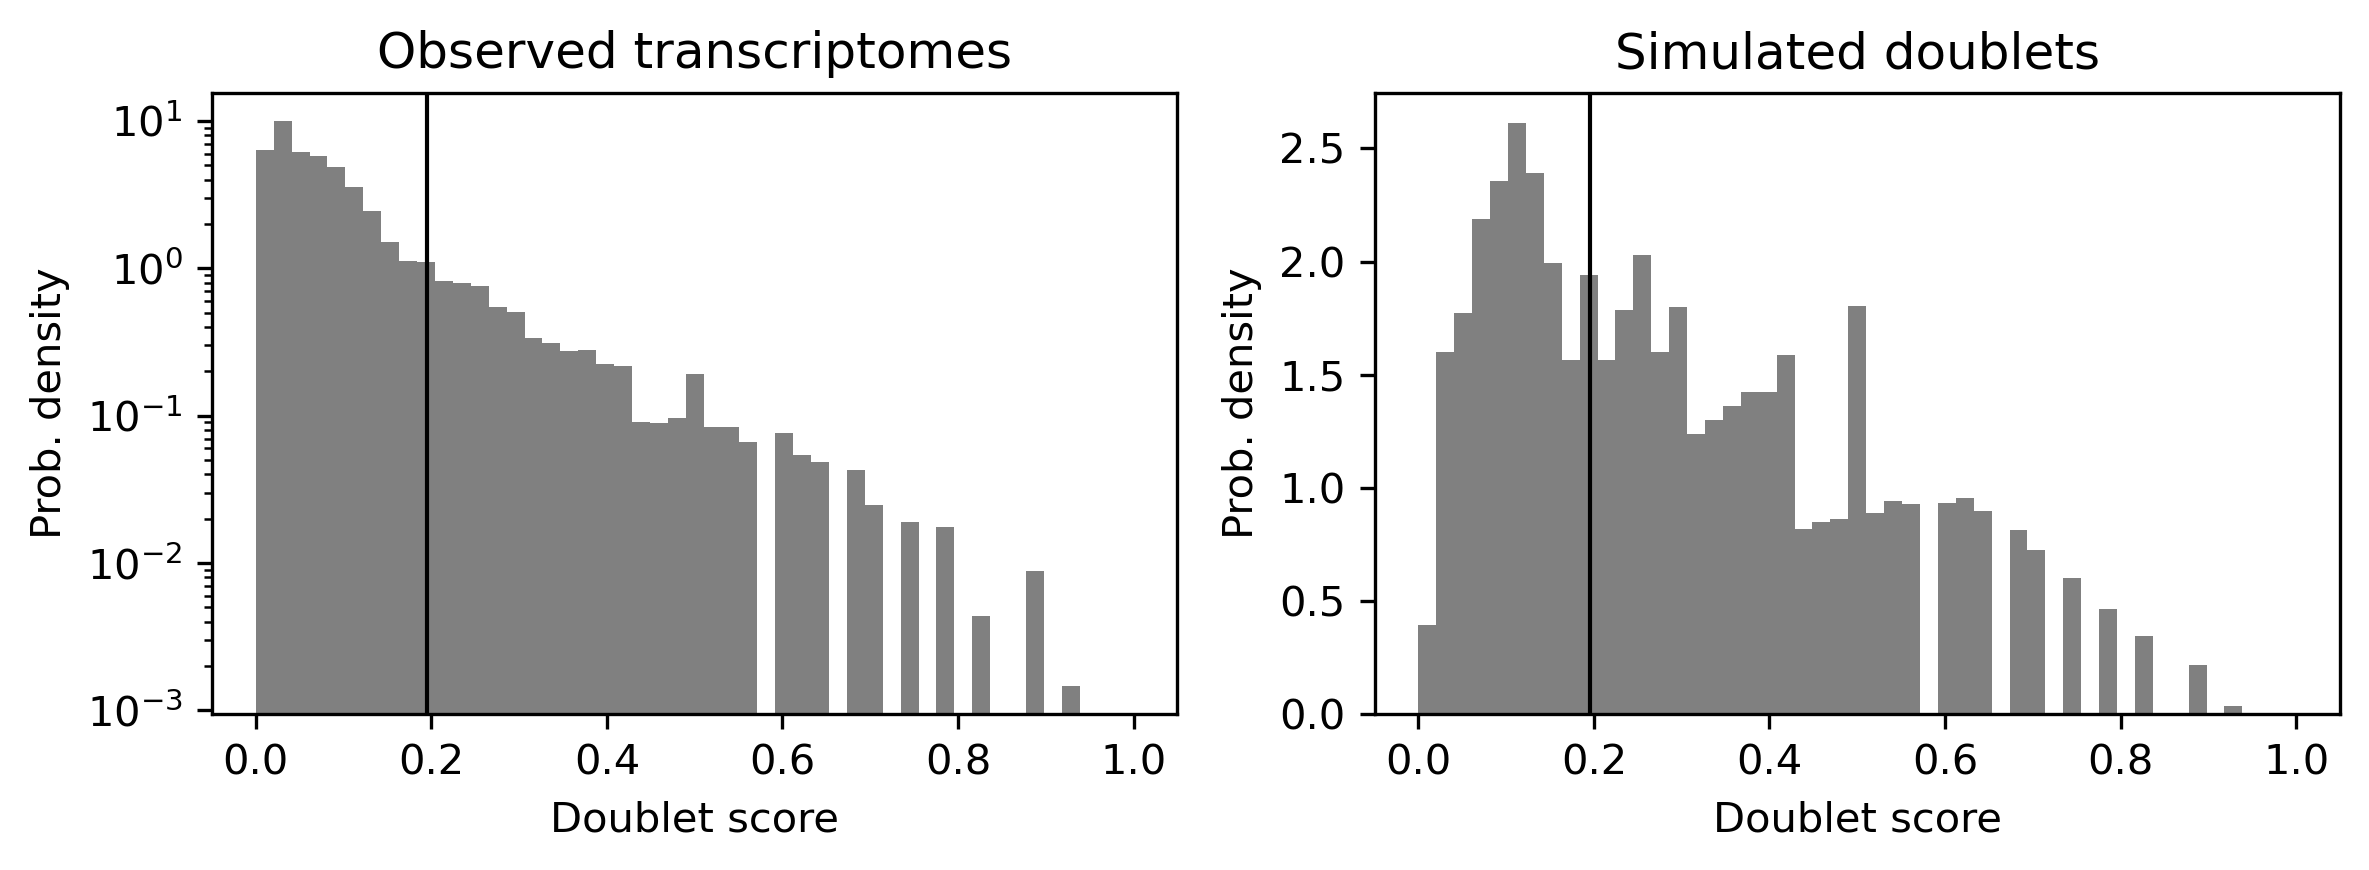

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.56
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.4%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.0%
Elapsed time: 1.2 seconds


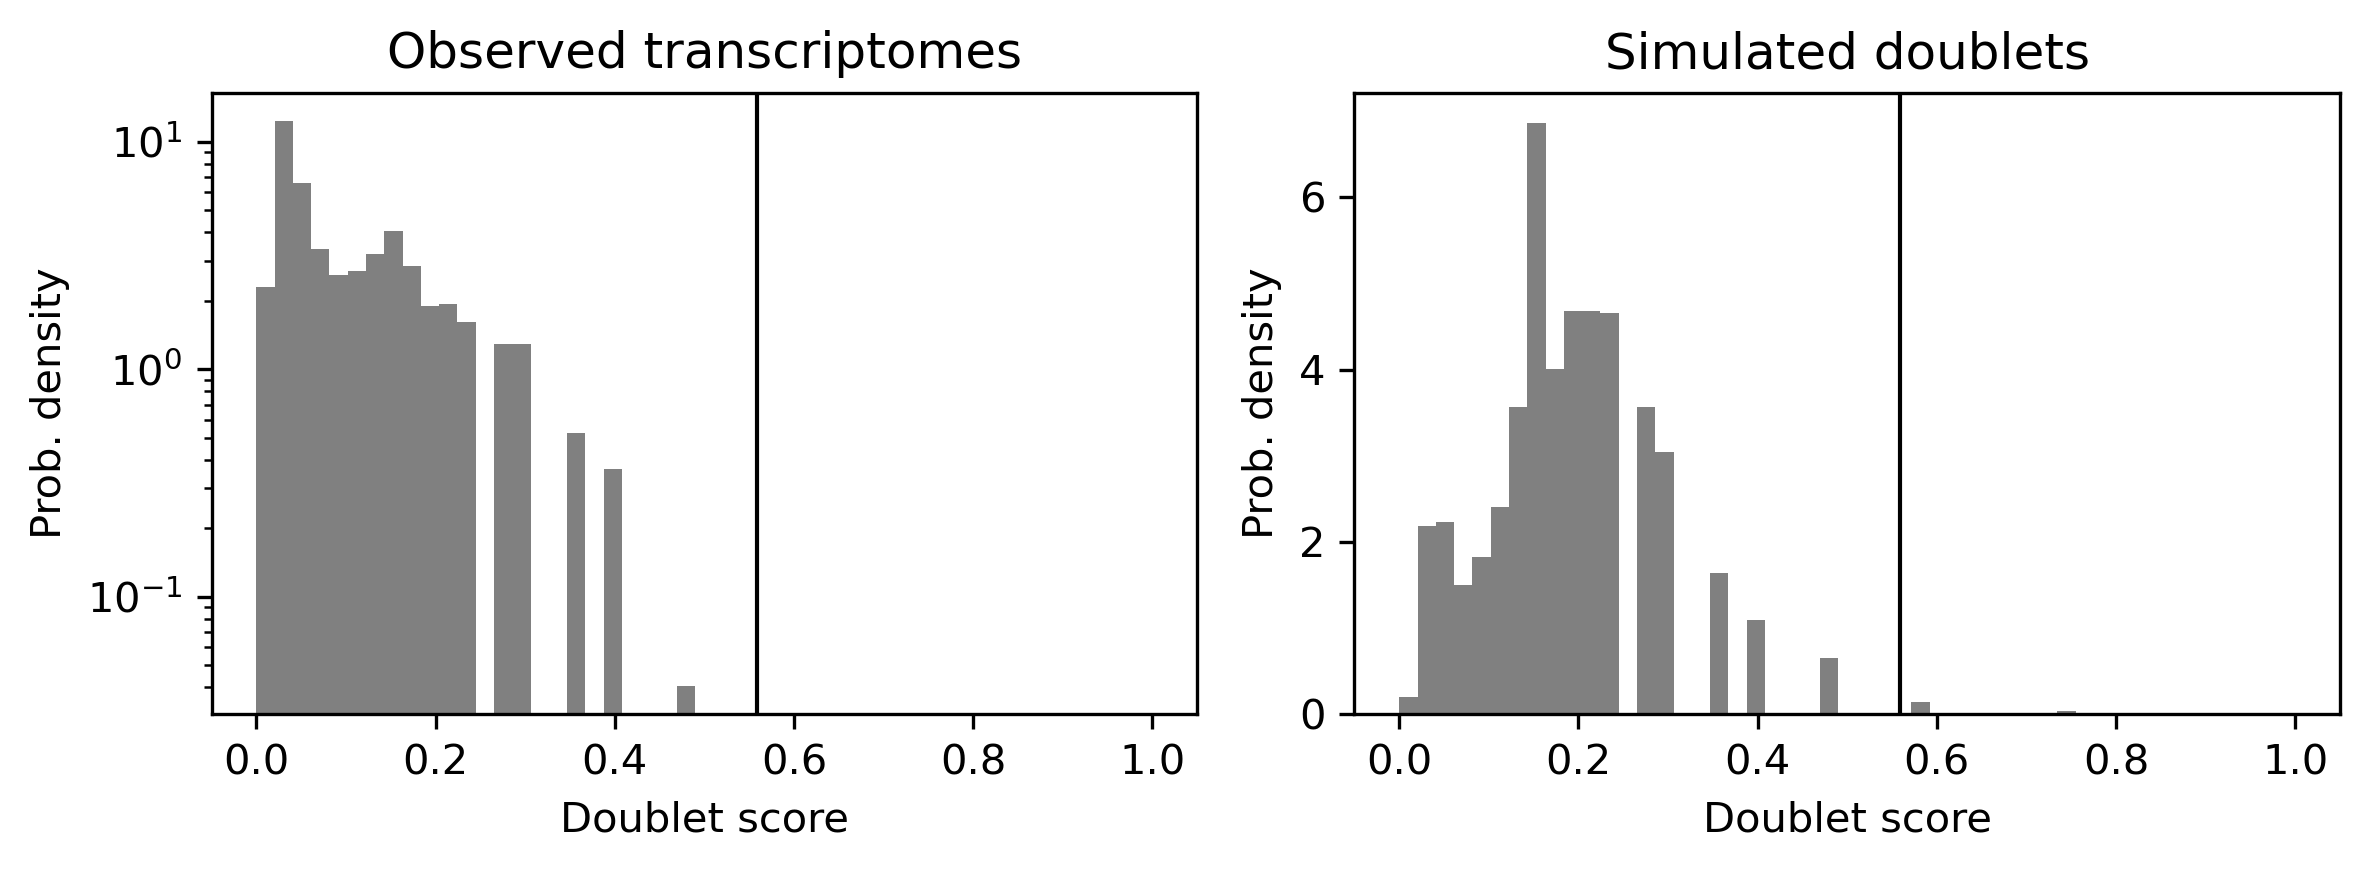

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.51
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 0.3%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 20.0%
Elapsed time: 1.6 seconds


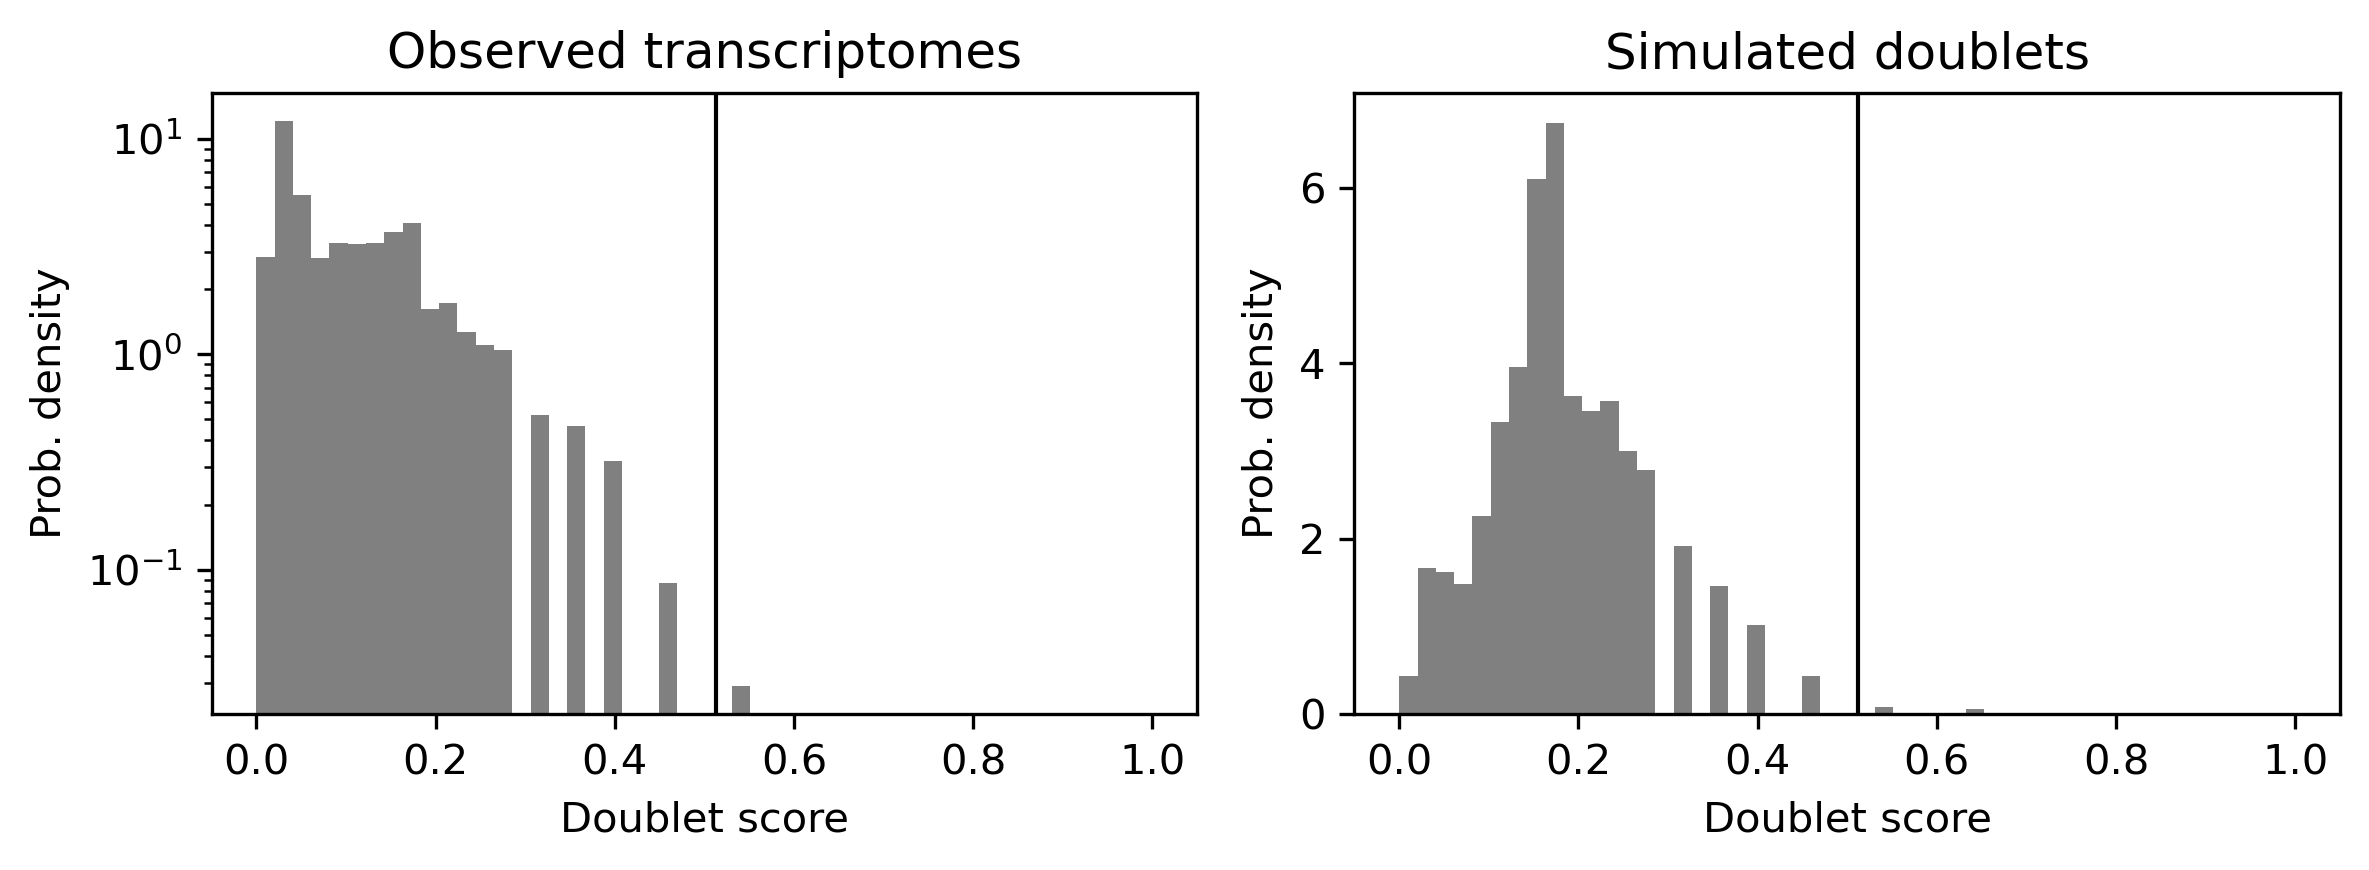

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.49
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.0%
Elapsed time: 1.5 seconds


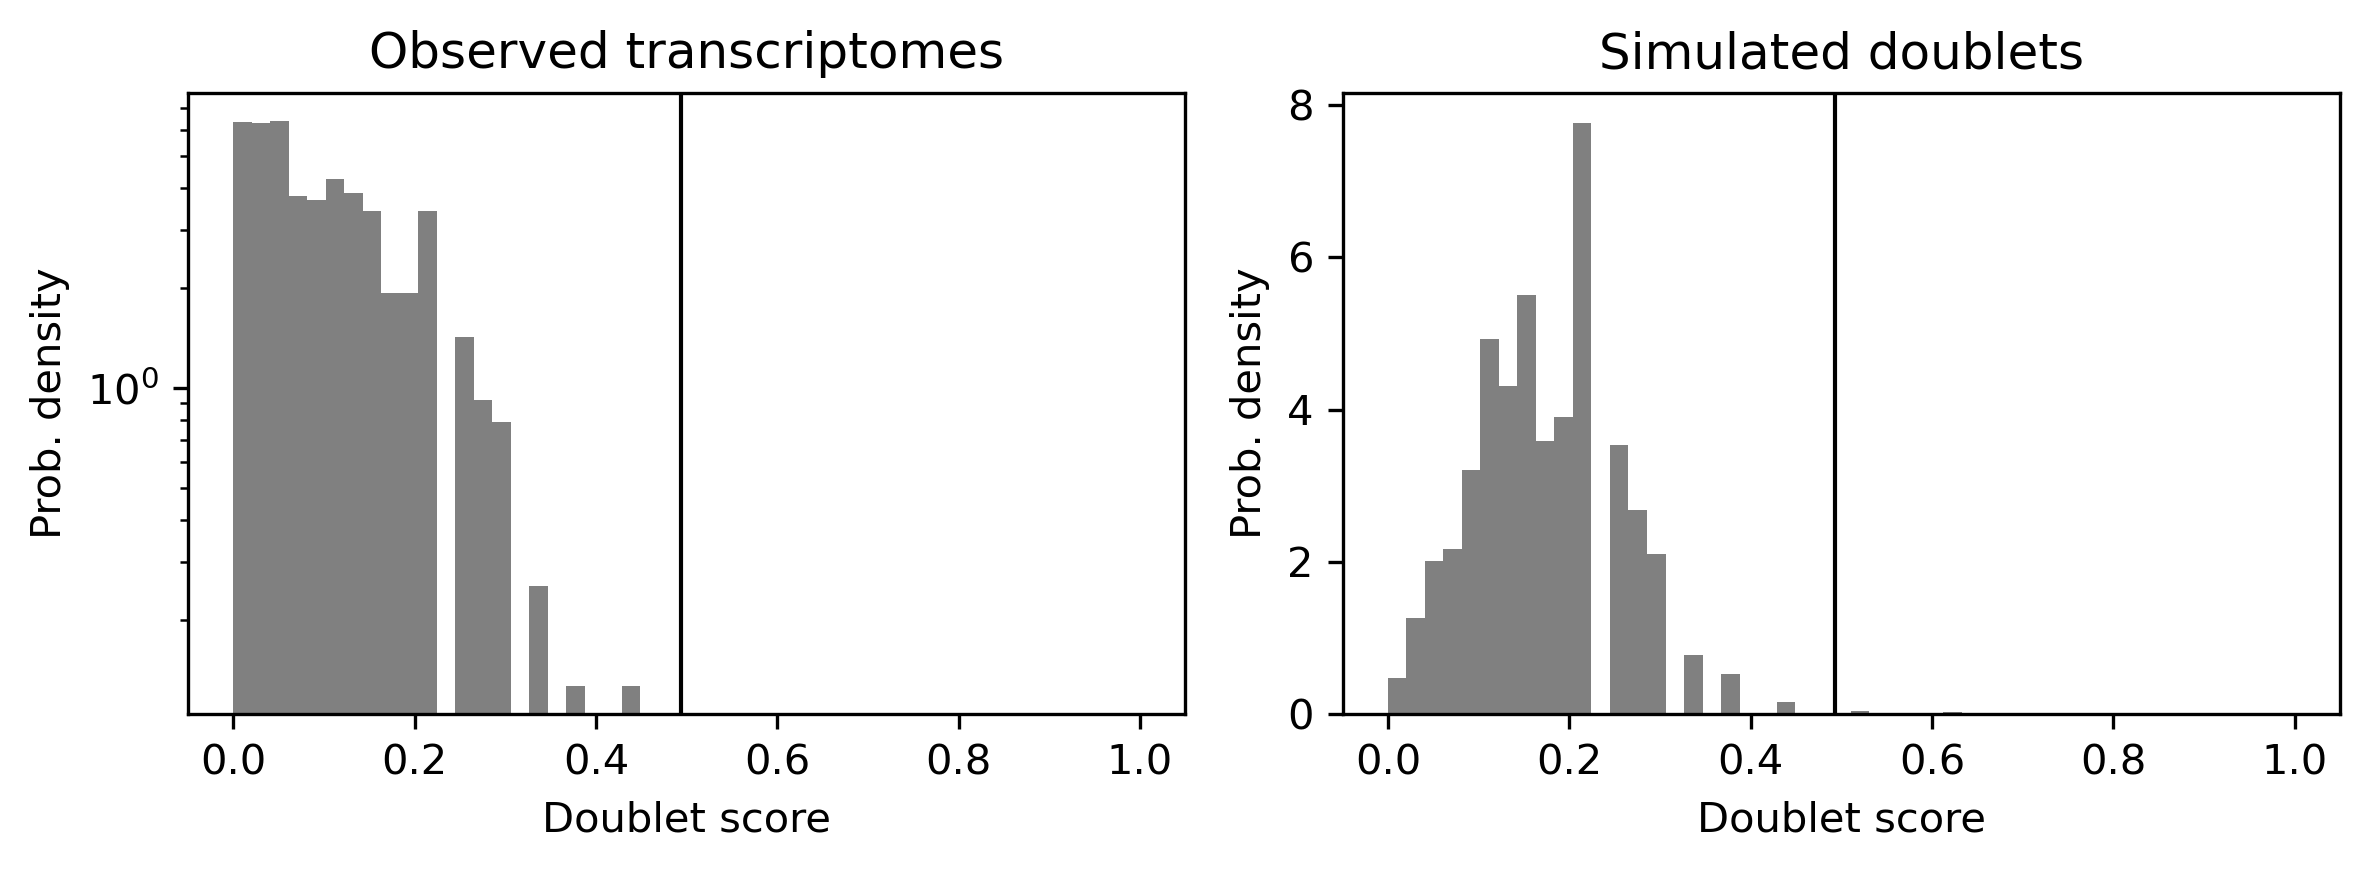

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.59
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 1.5%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 13.0%
Elapsed time: 1.6 seconds


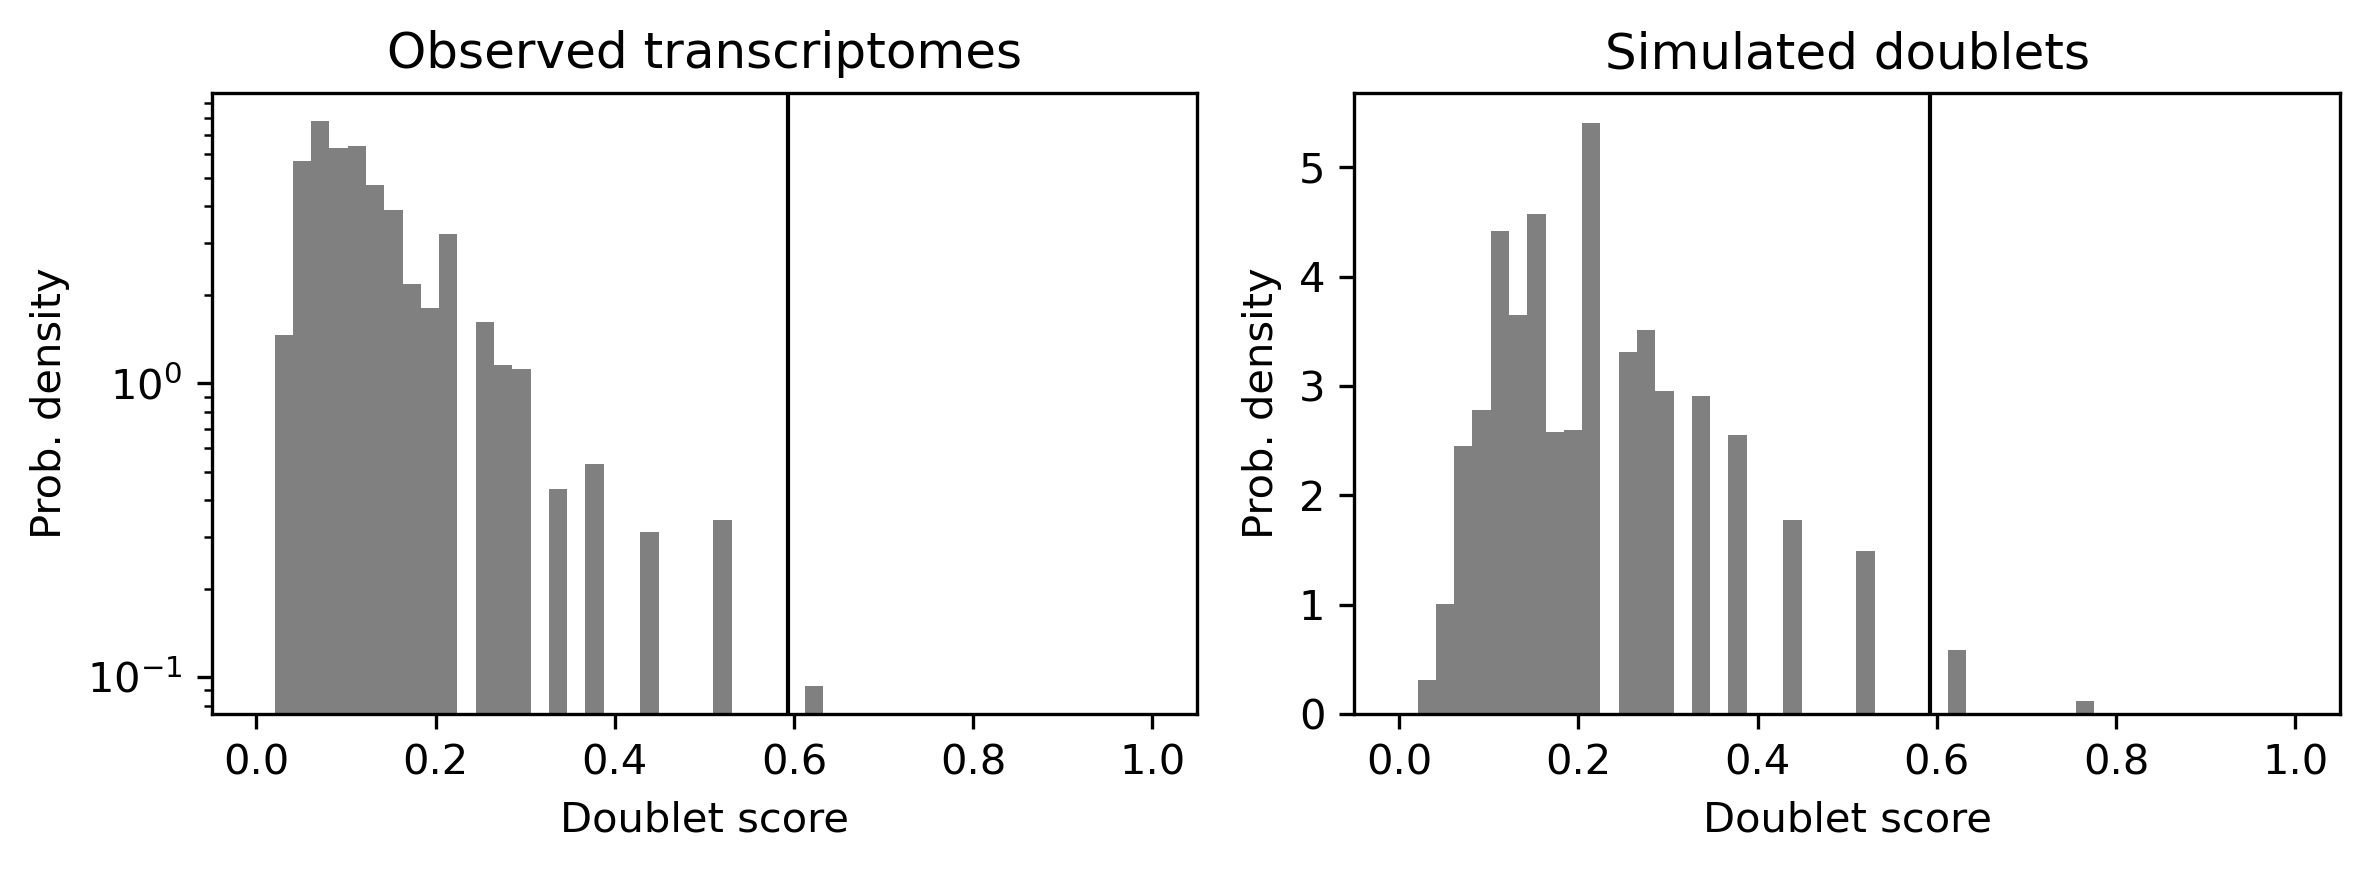

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.46
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 0.8%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 42.1%
Elapsed time: 1.2 seconds


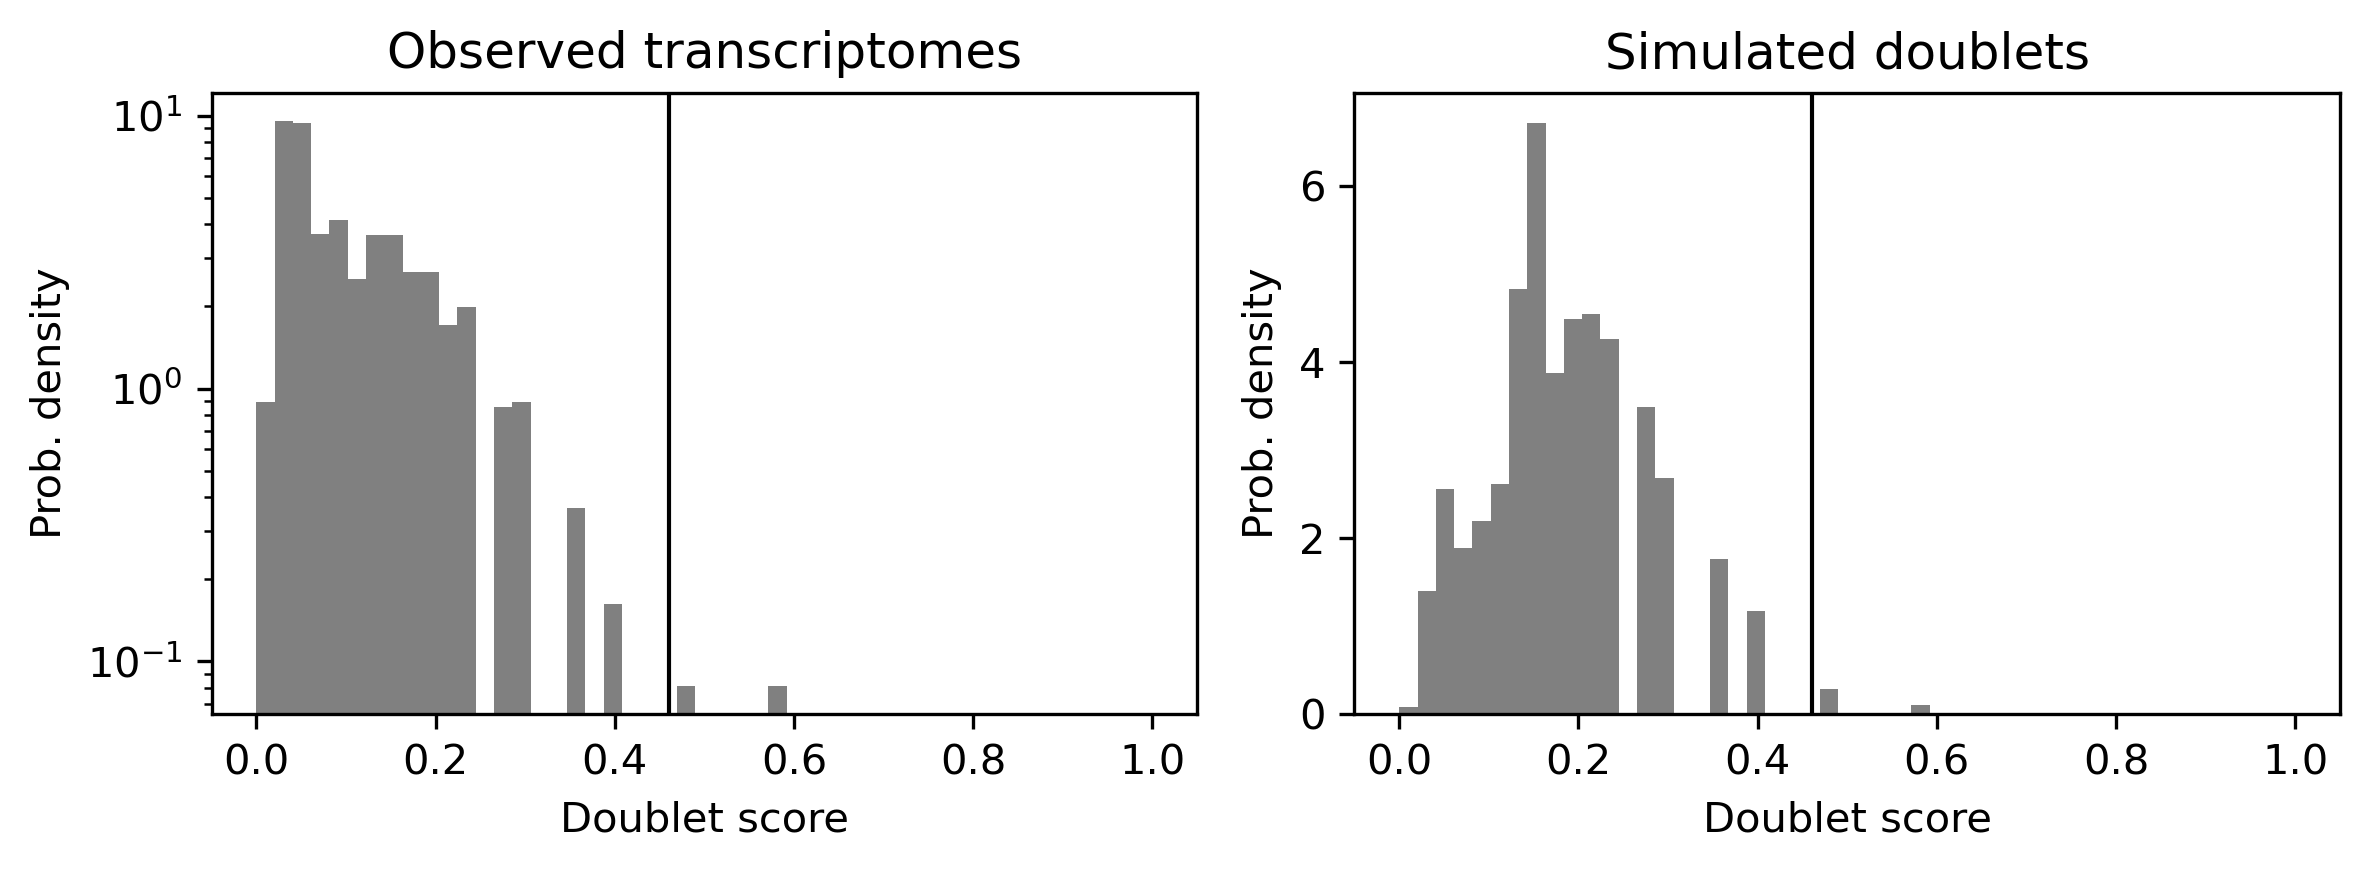

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.46
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 1.7%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 22.2%
Elapsed time: 0.7 seconds


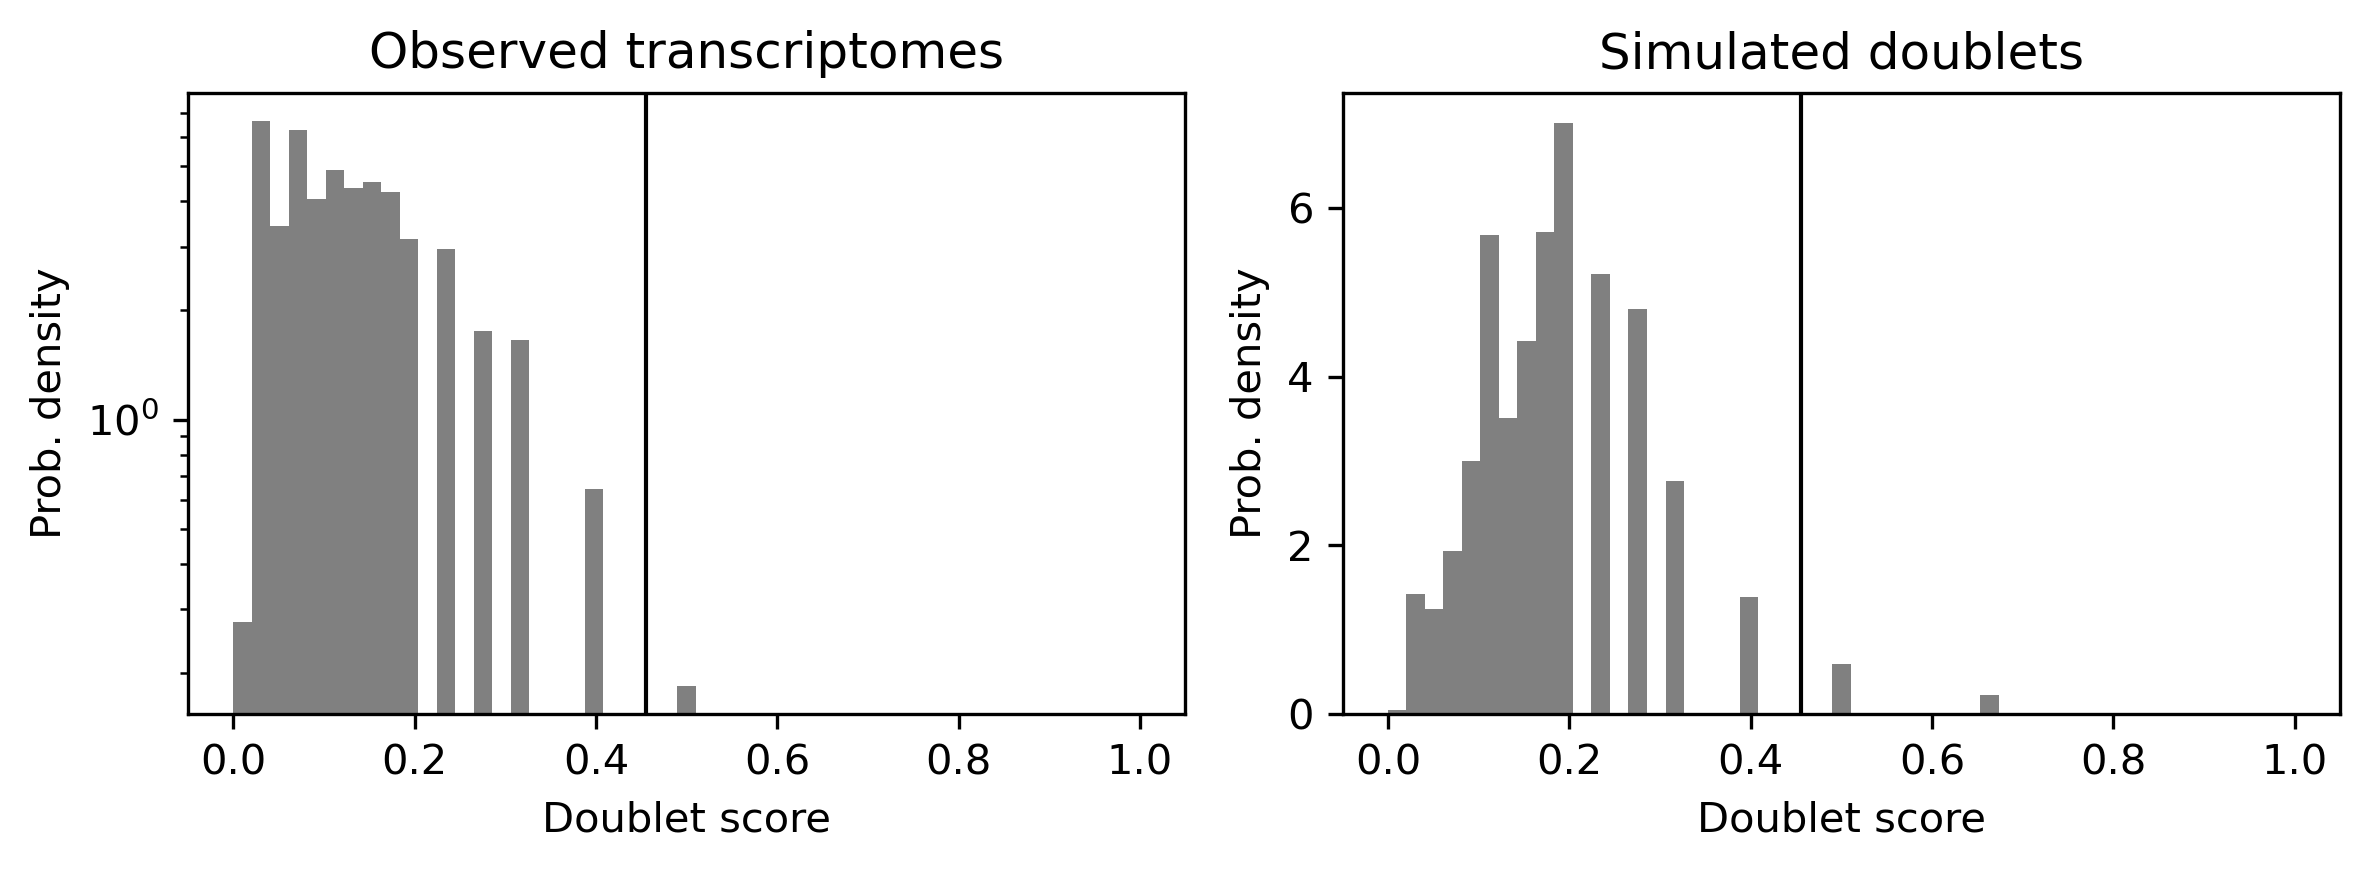

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.51
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 0.5%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 85.7%
Elapsed time: 1.0 seconds


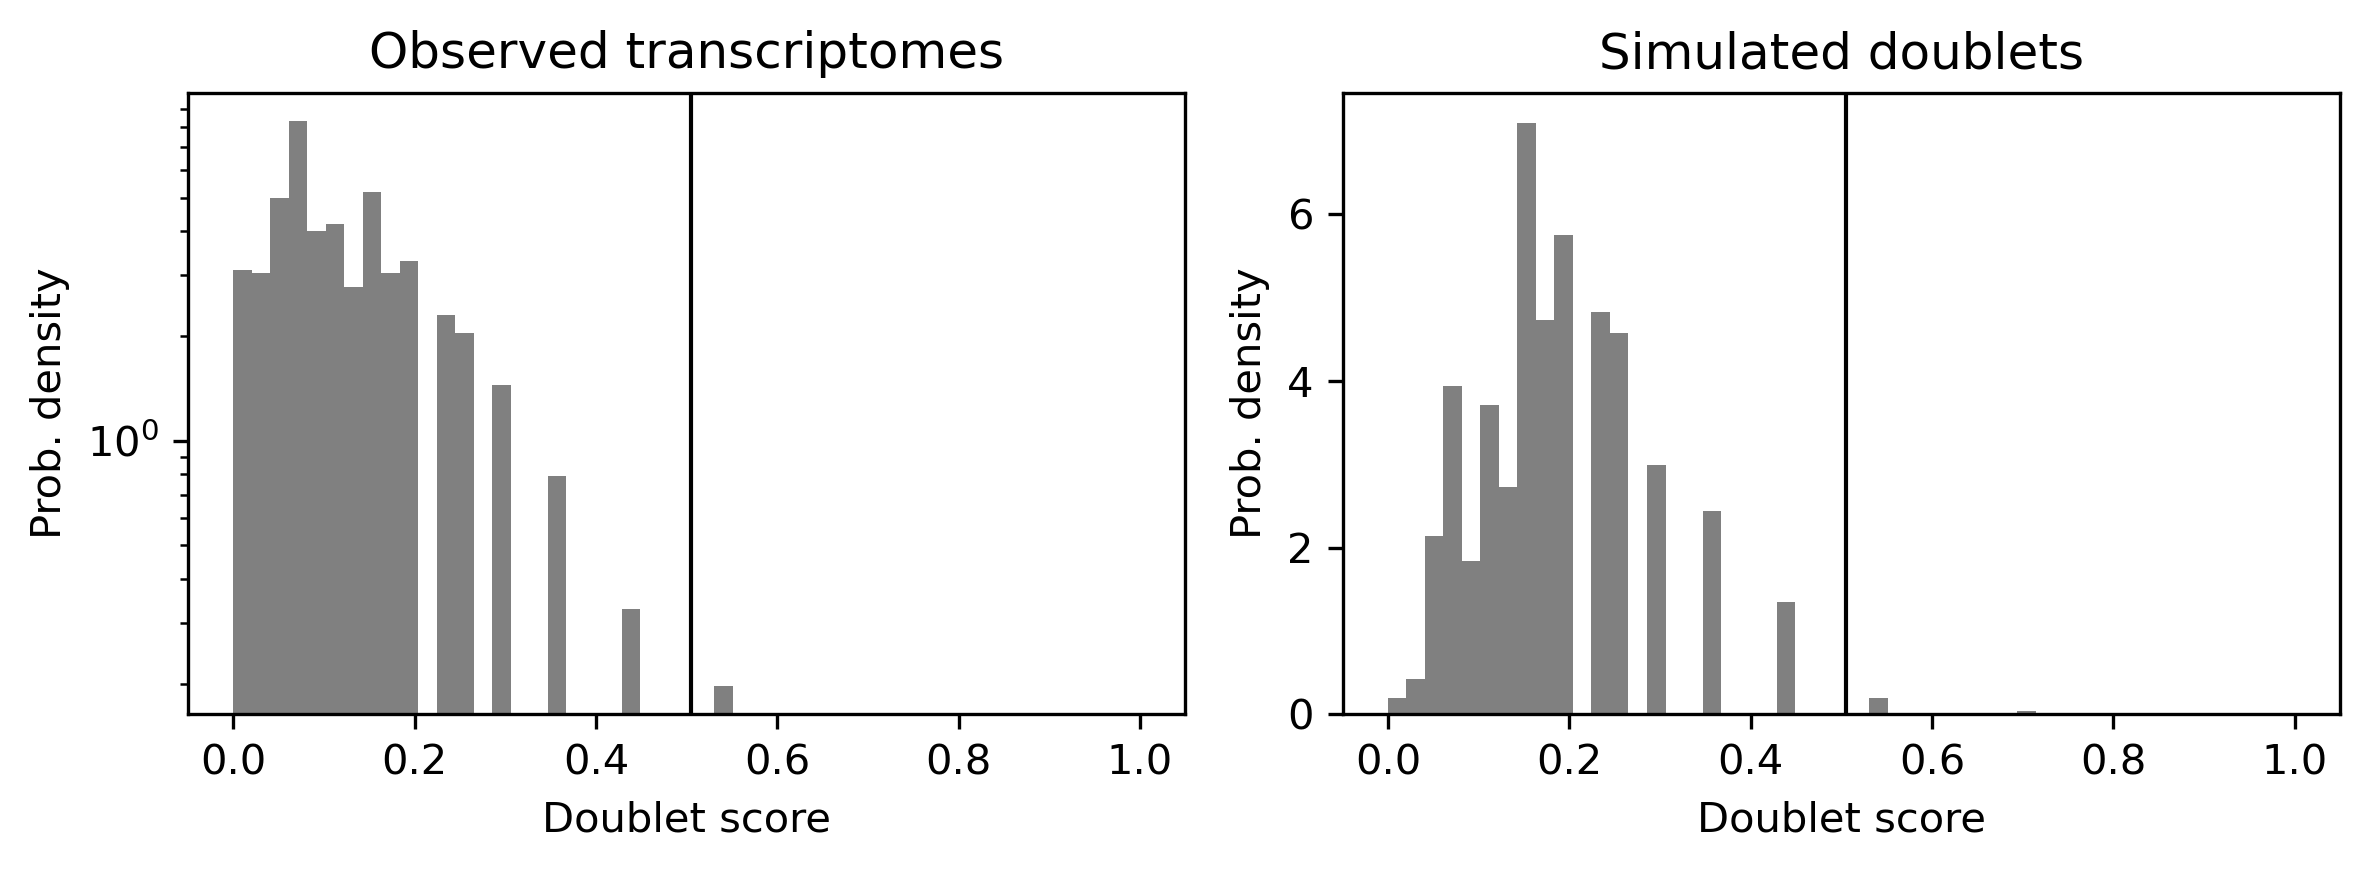

In [17]:
assigned_hashtag_names = raw_adata.obs['assigned_hashtag'].unique()

for assigned_hashtag_name in assigned_hashtag_names:
    mask = raw_adata.obs['assigned_hashtag'] == assigned_hashtag_name
    assigned_hashtag_raw_adata = raw_adata[mask].copy()

    scrub = scr.Scrublet(assigned_hashtag_raw_adata.X)

    assigned_hashtag_raw_adata.obs['doublet_scores'], assigned_hashtag_raw_adata.obs['predicted_doublets'] = scrub.scrub_doublets()

    raw_adata.obs.loc[mask, 'doublet_scores'] = assigned_hashtag_raw_adata.obs['doublet_scores']
    raw_adata.obs.loc[mask, 'predicted_doublets'] = assigned_hashtag_raw_adata.obs['predicted_doublets']

    scrub.plot_histogram()

    plt.show()

### Checking the count and percentage of Doublets to choose cutoff

Text(0.5, 1.0, 'Doublets counts and percentage')

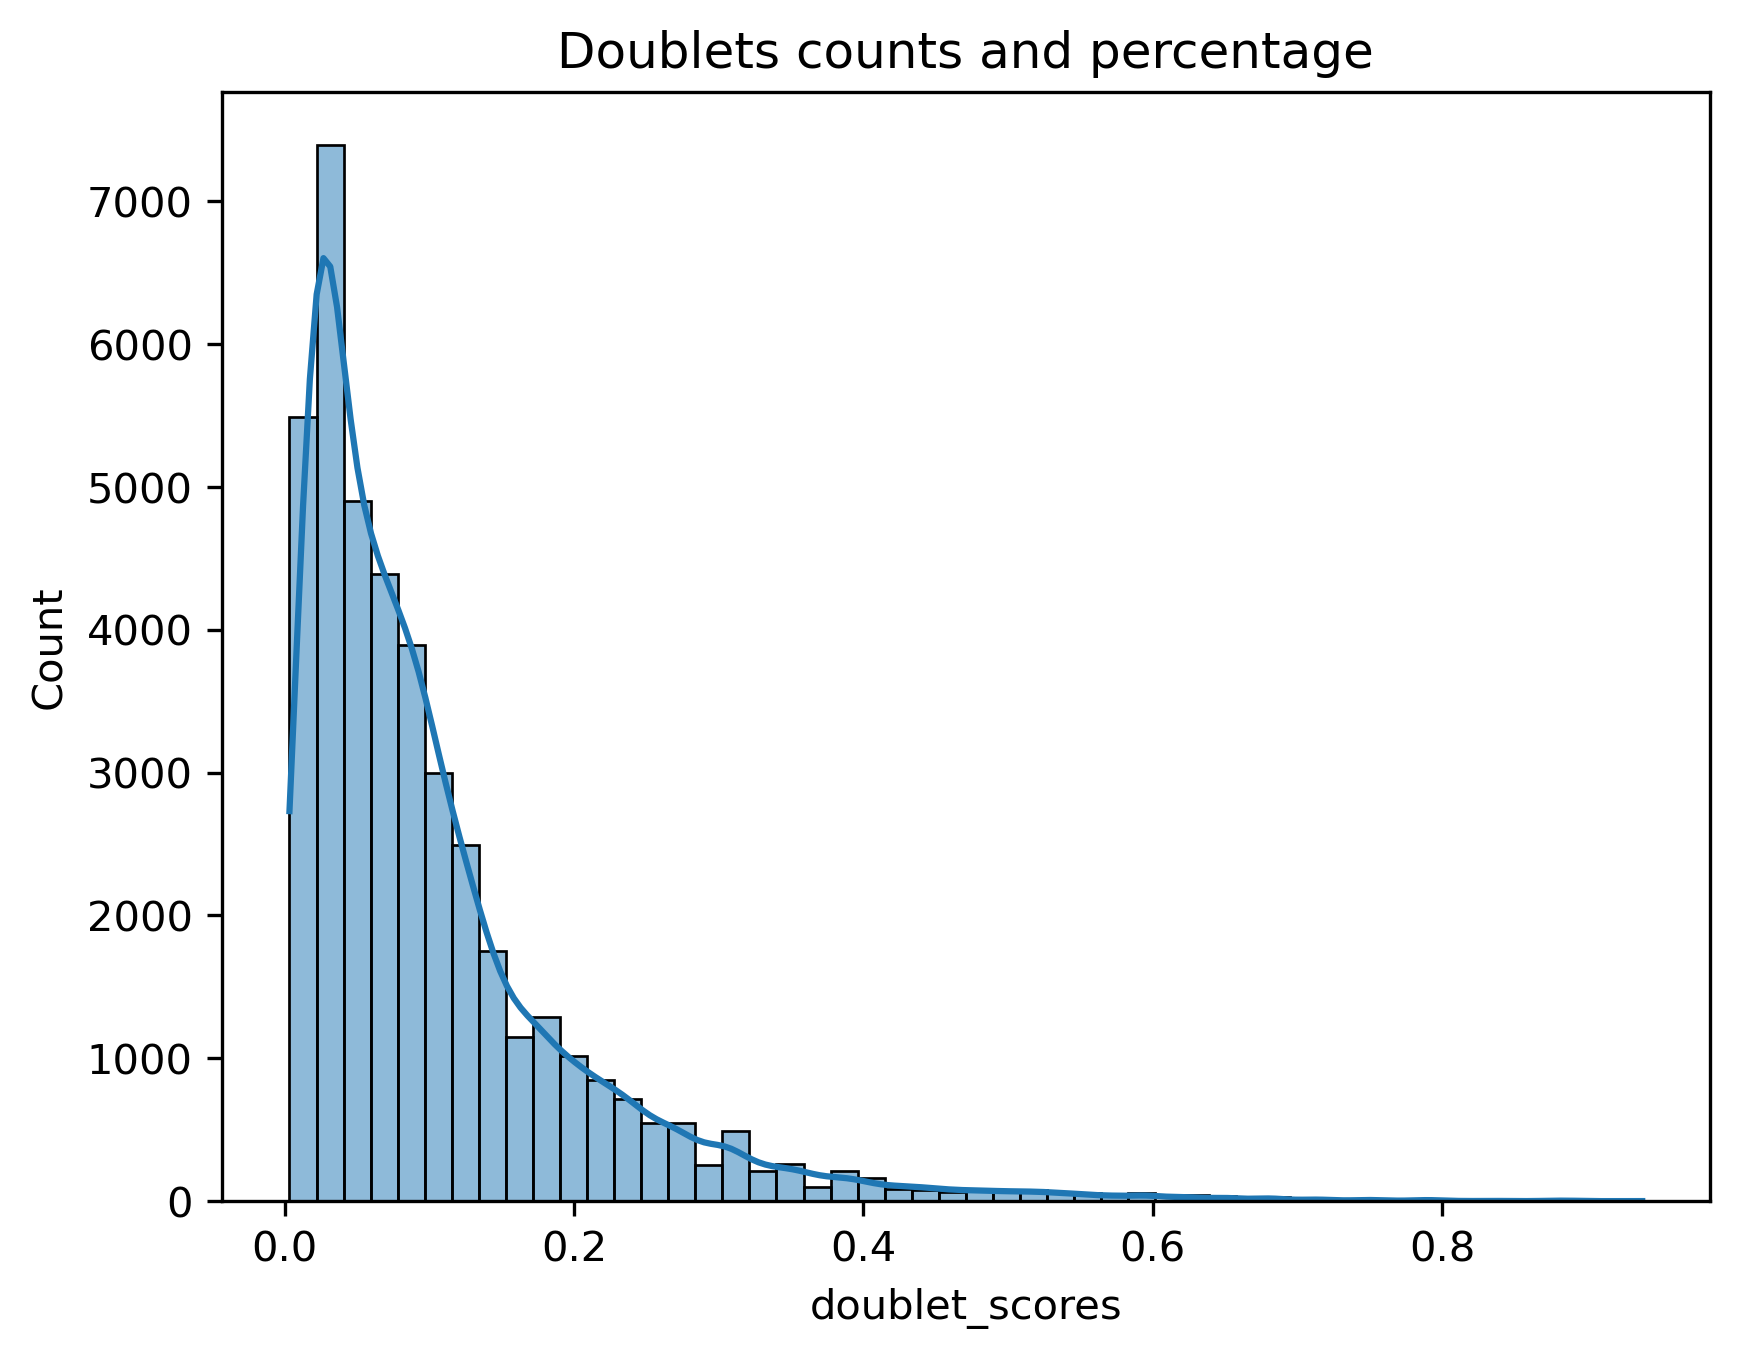

In [18]:
sb.histplot(raw_adata.obs['doublet_scores'], bins=50, kde=True)
plt.title('Doublets counts and percentage')

### Checking the count and percentage of Doublets - Anndata level

In [19]:
raw_adata

AnnData object with n_obs × n_vars = 41918 × 32293
    obs: 'assigned_hashtag', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'doublet_scores', 'predicted_doublets'
    var: 'gene_ids', 'feature_types'
    obsm: 'hto_counts'

In [20]:
doub_tab = pd.crosstab(raw_adata.obs['assigned_hashtag'],raw_adata.obs['predicted_doublets'])
doub_tab.sum()

predicted_doublets
False    37379
True      4539
dtype: int64

In [21]:
true_doublets = raw_adata.obs['predicted_doublets'] == True
true_doublets_count = true_doublets.sum()

true_doublets_percentage = (true_doublets_count / len(raw_adata.obs)) * 100

true_doublets_count ,true_doublets_percentage

(np.int64(4539), np.float64(10.828283792165657))

### Checking the count of Doublets - Sample level

In [22]:
doublet_counts_per_assigned_hashtag = raw_adata.obs.groupby(['assigned_hashtag', 'Group'])['predicted_doublets'].sum().reset_index()
doublet_counts_per_assigned_hashtag.rename(columns={'predicted_doublets': 'Doublet_Count'}, inplace=True)
print(doublet_counts_per_assigned_hashtag)

  assigned_hashtag   Group Doublet_Count
0            Hash1    MCMV             4
1            Hash3    MCMV          4526
2            Hash4    MCMV             3
3            Hash5  noninf             3
4            Hash6  noninf             0
5            Hash7  noninf             2
6            Hash8  noninf             1
7            Hash9    MCMV             0


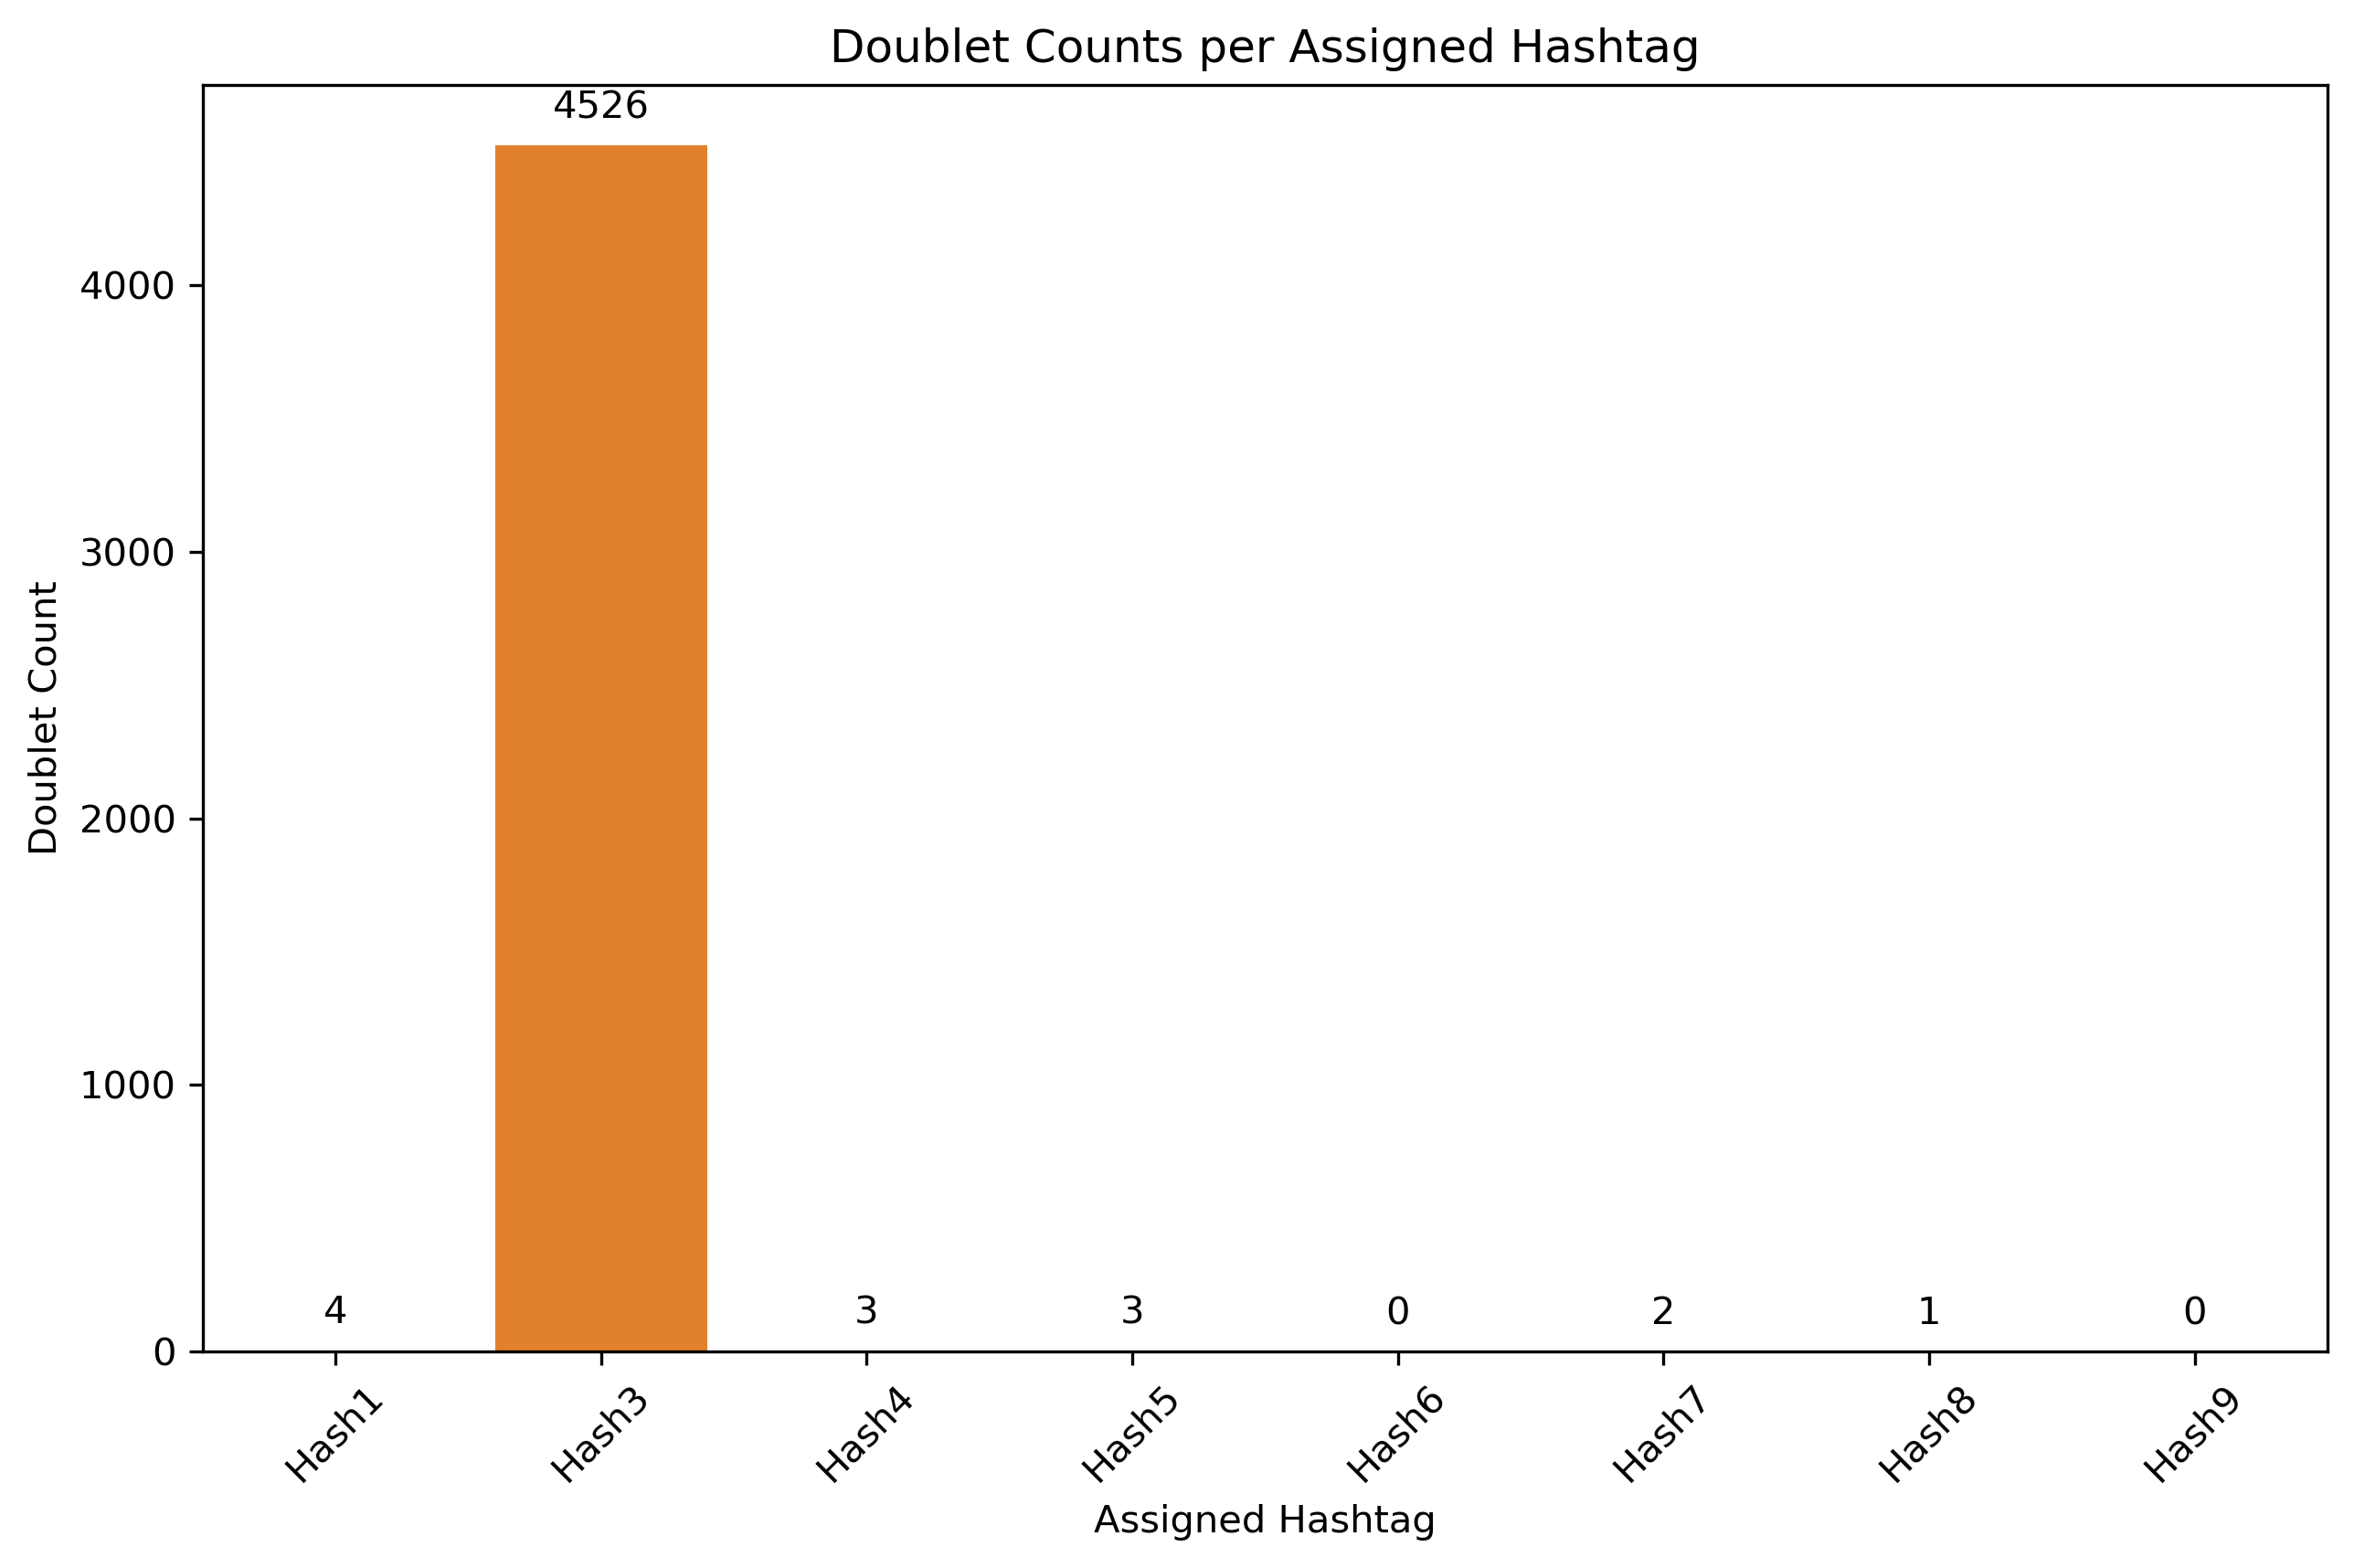

In [23]:
plt.figure(figsize=(10, 6))

ax = sb.barplot(data=doublet_counts_per_assigned_hashtag, x='assigned_hashtag', y='Doublet_Count', hue='assigned_hashtag')

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)
plt.xlabel("Assigned Hashtag")
plt.ylabel("Doublet Count")
plt.title("Doublet Counts per Assigned Hashtag")
plt.show()

In [24]:
raw_adata = raw_adata[raw_adata.obs['predicted_doublets'] == False].copy()
raw_adata

AnnData object with n_obs × n_vars = 37379 × 32293
    obs: 'assigned_hashtag', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'doublet_scores', 'predicted_doublets'
    var: 'gene_ids', 'feature_types'
    obsm: 'hto_counts'

## Mt and Ribo Genes

In [25]:
raw_adata.var['mt'] = raw_adata.var_names.str.startswith('mt-') 
raw_adata.var['ribo'] = raw_adata.var_names.str.startswith(("Rps","Rpl"))
raw_adata.var

,gene_ids,feature_types,mt,ribo
Xkr4,ENSMUSG00000051951,Gene Expression,False,False
Gm1992,ENSMUSG00000089699,Gene Expression,False,False
Gm19938,ENSMUSG00000102331,Gene Expression,False,False
Gm37381,ENSMUSG00000102343,Gene Expression,False,False
Rp1,ENSMUSG00000025900,Gene Expression,False,False
...,...,...,...,...
TotalSeqB5,Hash5,Antibody Capture,False,False
TotalSeqB6,Hash6,Antibody Capture,False,False
TotalSeqB7,Hash7,Antibody Capture,False,False
TotalSeqB8,Hash8,Antibody Capture,False,False


In [26]:
ribo_counts = raw_adata.var['ribo'].value_counts()

mt_counts = raw_adata.var['mt'].value_counts()

print("Counts of Ribosomal (ribo) Genes:")
print("False:", ribo_counts.get(False, 0))
print("True:", ribo_counts.get(True, 0))
print("\nCounts of Mitochondrial (mt) Genes:")
print("False:", mt_counts.get(False, 0))
print("True:", mt_counts.get(True, 0))

Counts of Ribosomal (ribo) Genes:
False: 32192
True: 101

Counts of Mitochondrial (mt) Genes:
False: 32280
True: 13


## Calculating QC metrics per cell

In [27]:
sc.pp.calculate_qc_metrics(raw_adata, qc_vars = ['mt','ribo'], percent_top = None, log1p = False, inplace = True)
raw_adata

AnnData object with n_obs × n_vars = 37379 × 32293
    obs: 'assigned_hashtag', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'hto_counts'

### Visualization of qc metrics

Text(0.5, 1.0, 'Mt and Ribo percentages - Before filtering')

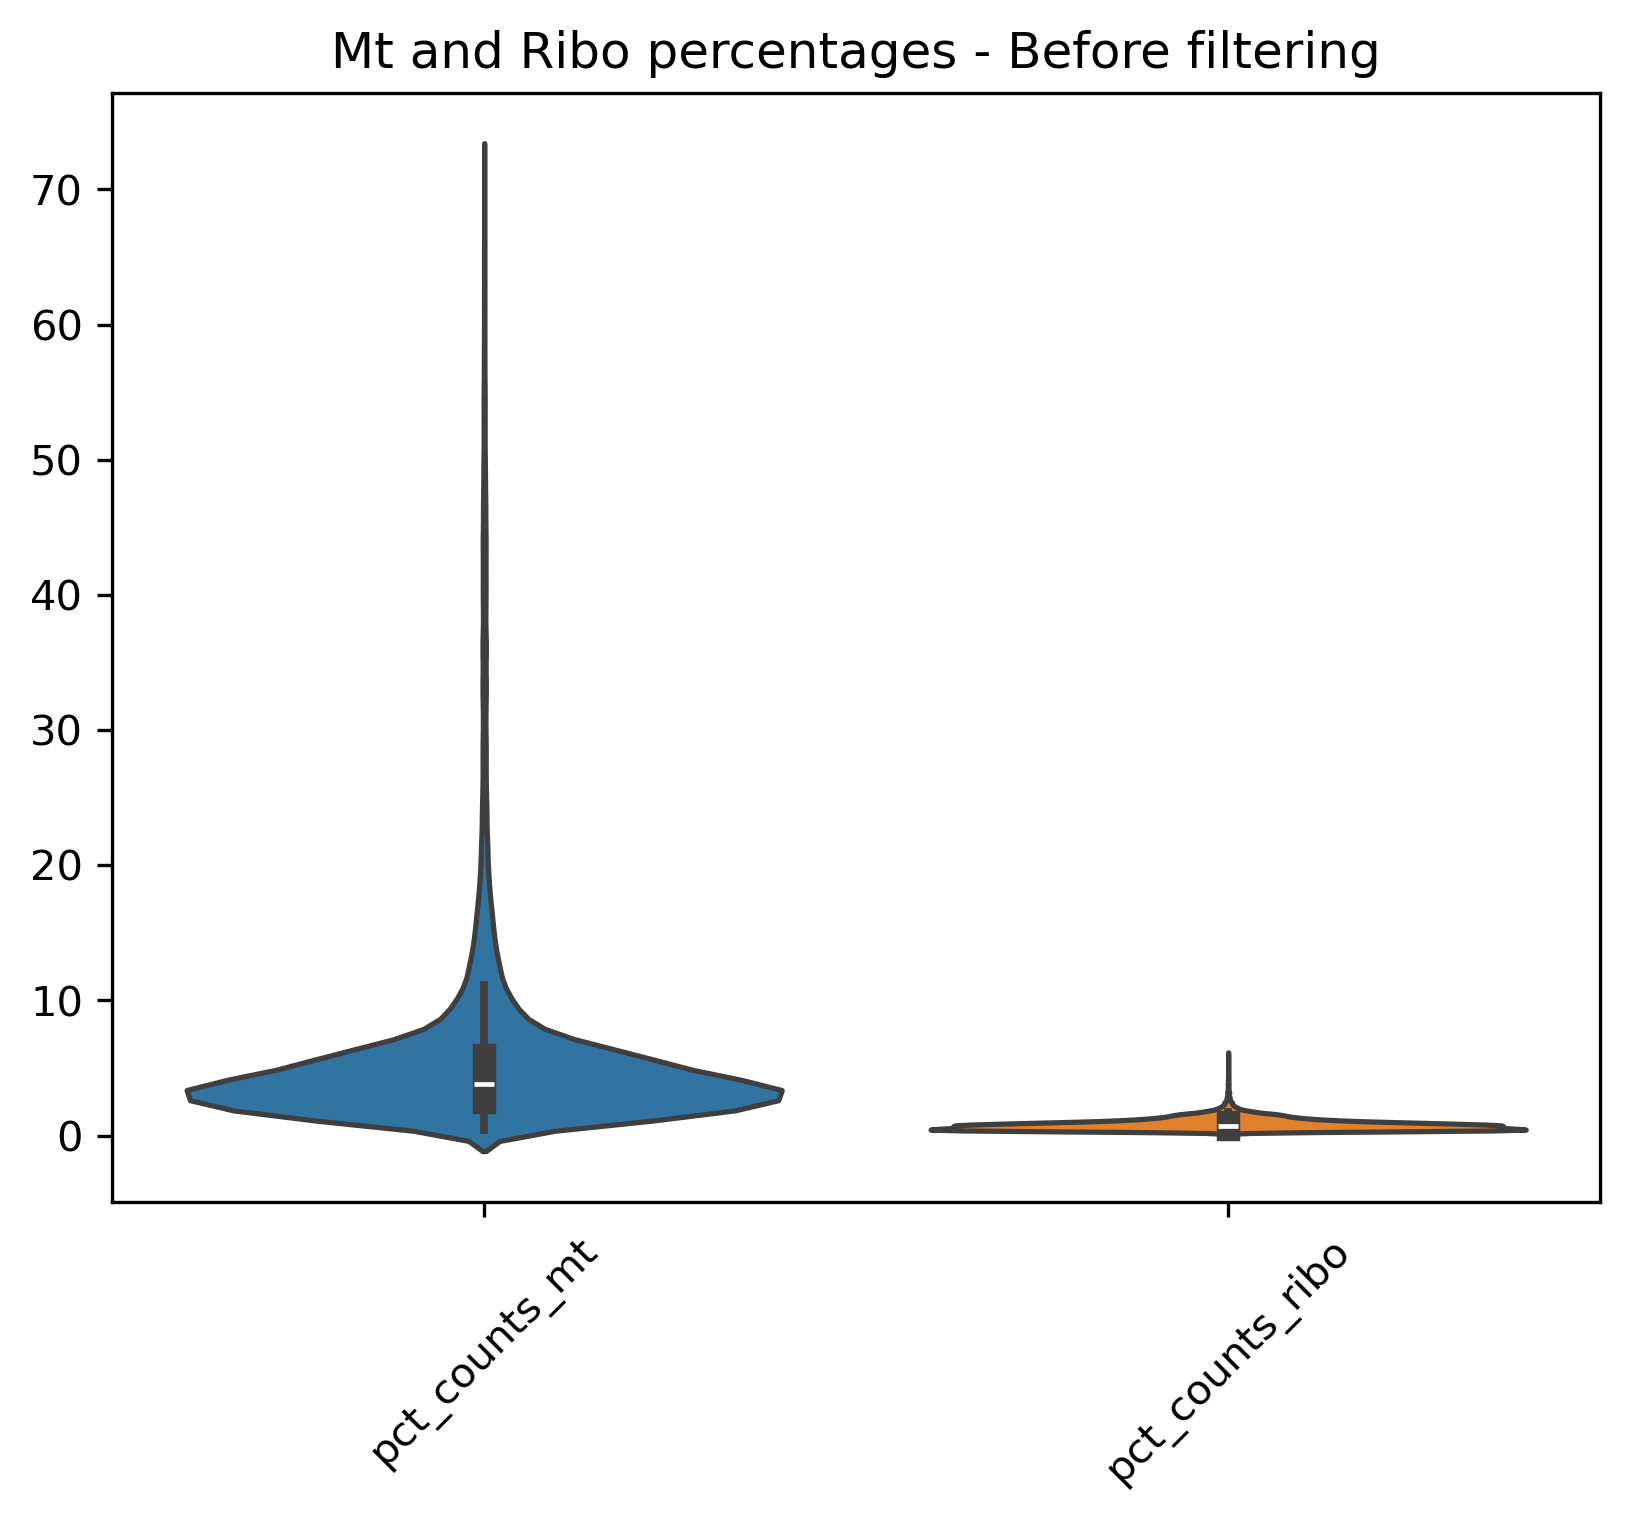

In [28]:
variables = ['pct_counts_mt', 'pct_counts_ribo']

sb.violinplot(data=raw_adata.obs[variables])
plt.xticks(rotation=45)
plt.title(f'Mt and Ribo percentages - Before filtering')

<Axes: ylabel='doublet_scores'>

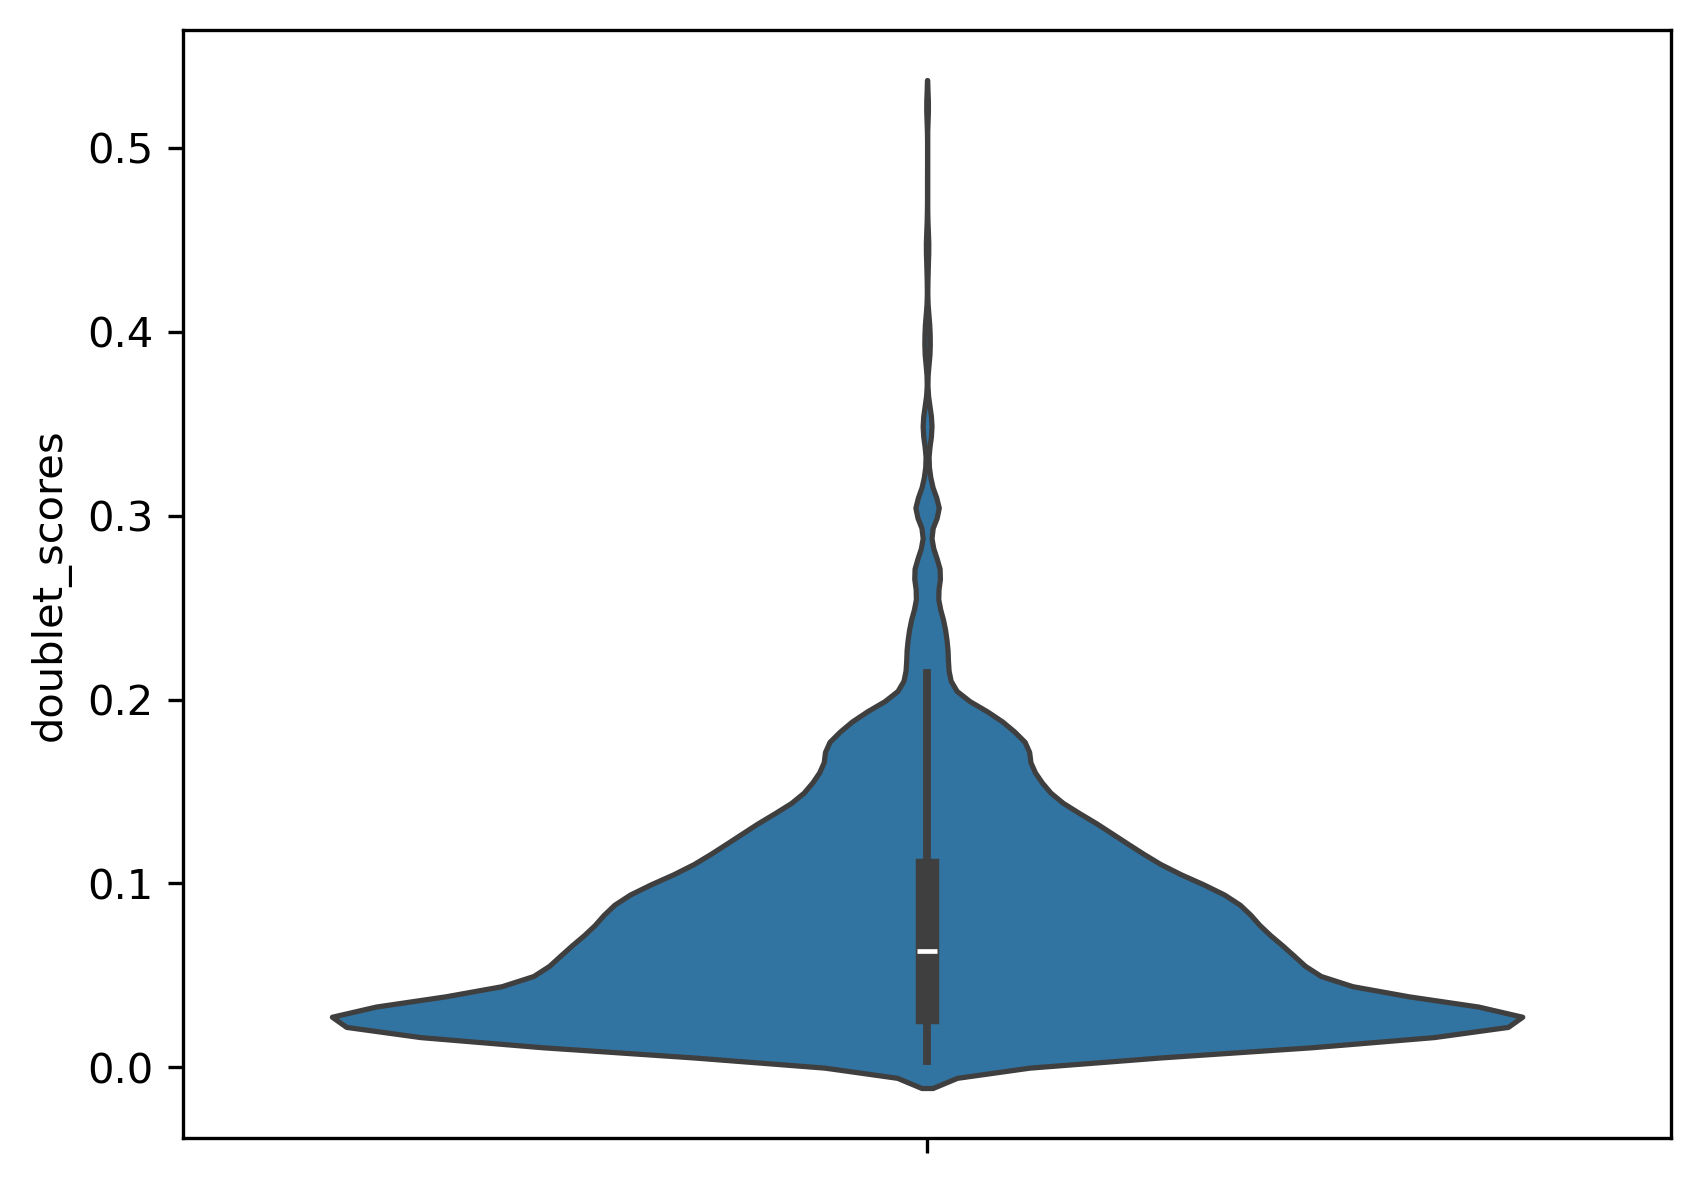

In [29]:
sb.violinplot(raw_adata.obs['doublet_scores'])

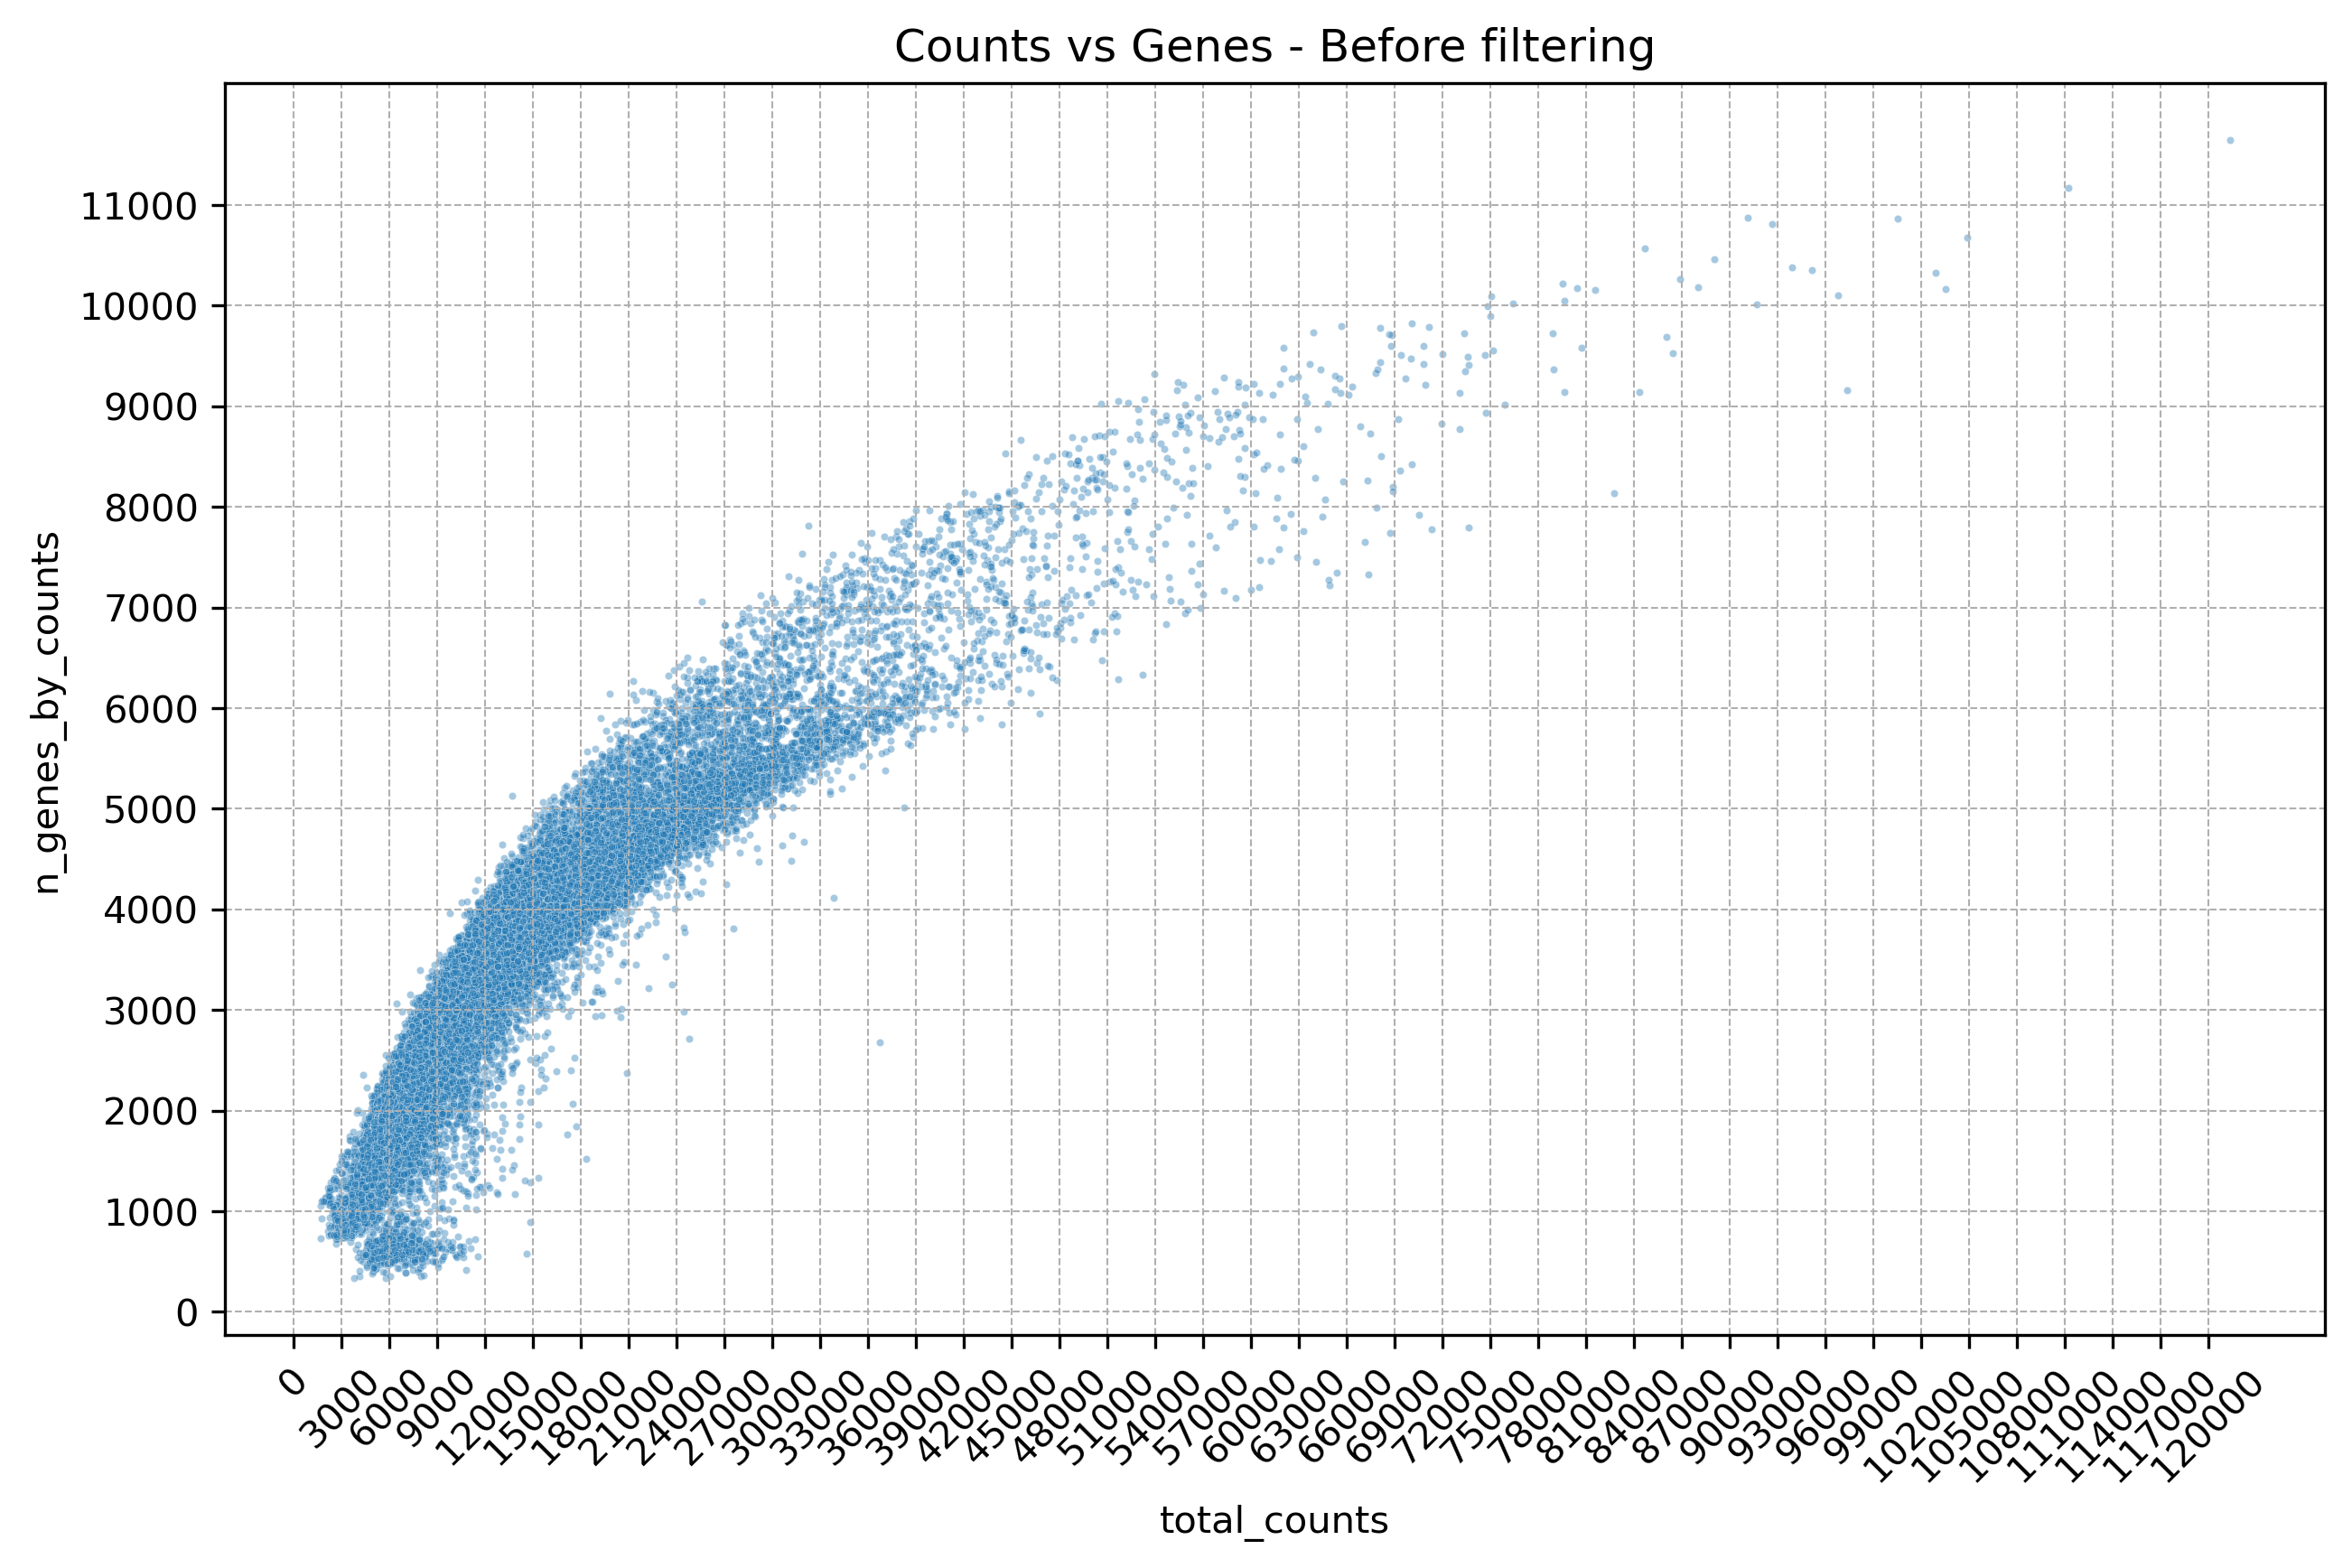

In [30]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=raw_adata.obs, x='total_counts', y='n_genes_by_counts' , alpha = 0.4, s=4)
plt.xticks(range(0, int(max(raw_adata.obs['total_counts'])) + 1, 3000),rotation=45, fontsize = 10)
plt.yticks(range(0, int(max(raw_adata.obs['n_genes_by_counts'])) + 1, 1000),fontsize = 10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title(f'Counts vs Genes - Before filtering')
plt.show()

### Filtering based on QC metrics

In [31]:
filtered_object = raw_adata[raw_adata.obs['pct_counts_mt'] < 20]
filtered_object = filtered_object[filtered_object.obs['doublet_scores'] < 0.35]
filtered_object

View of AnnData object with n_obs × n_vars = 36120 × 32293
    obs: 'assigned_hashtag', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'hto_counts'

# Clustering

In [32]:
sc.pp.neighbors(filtered_object)
sc.tl.leiden(filtered_object)
filtered_object

computing neighbors
computing PCA
    with n_comps=50


/home/gruengroup/srivalli/miniconda3/envs/scanpy/lib/python3.13/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 32293 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


    finished (0:00:22)


/home/gruengroup/srivalli/miniconda3/envs/scanpy/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:55)
running Leiden clustering


/tmp/ipykernel_933440/3210525439.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(filtered_object)


    finished: found 25 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:18)


AnnData object with n_obs × n_vars = 36120 × 32293
    obs: 'assigned_hashtag', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'pca', 'neighbors', 'leiden'
    obsm: 'hto_counts', 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

# Hashsolo

1. Convert hto_counts to a DataFrame
2. Add the HTO counts DataFrame as new columns in `obs`

In [33]:
hto_df = pd.DataFrame(filtered_object.obsm['hto_counts'], index=filtered_object.obs.index)
filtered_object.obs = filtered_object.obs.join(hto_df)
filtered_object.obs.head()

,assigned_hashtag,Sample,Sample-ID,Mouse-ID,Sex,Group,Ref hashtag,Nuclei Purification Method after Hashing,doublet_scores,predicted_doublets,...,leiden,TotalSeqB1,TotalSeqB3,TotalSeqB4,TotalSeqB5,TotalSeqB6,TotalSeqB7,TotalSeqB8,TotalSeqB9,Assigned_Hashtag
AAACCAAAGCCAGTGT-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,0.121137,False,...,2,168.0,422.0,401.0,115.0,181.0,124.0,214.0,335.0,NaN
AAACCAAAGGCGTCCA-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,0.133245,False,...,2,196.0,486.0,238.0,145.0,210.0,155.0,255.0,243.0,NaN
AAACCAAAGGTTAGCC-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,0.081367,False,...,8,185.0,615.0,113.0,158.0,236.0,122.0,243.0,189.0,NaN
AAACCAAAGTACCACA-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,0.038397,False,...,7,181.0,433.0,89.0,132.0,207.0,175.0,231.0,207.0,NaN
AAACCAAAGTAGCCGT-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,0.098060,False,...,7,227.0,441.0,154.0,120.0,194.0,123.0,228.0,189.0,NaN


In [34]:
sc.external.pp.hashsolo(
    filtered_object, 
    cell_hashing_columns=['TotalSeqB1', 'TotalSeqB3', 'TotalSeqB4', 'TotalSeqB5', 
                          'TotalSeqB6', 'TotalSeqB7', 'TotalSeqB8', 'TotalSeqB9'],
    pre_existing_clusters= 'leiden' ,
    priors= (0.01, 0.8, 0.19)) ## Default prior probabilities of [negative, singlet, doublet]

Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2


/home/gruengroup/srivalli/miniconda3/envs/scanpy/lib/python3.13/site-packages/scanpy/external/pp/_hashsolo.py:390: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  results.loc[cluster_feature_bool_vector, "cluster_feature"] = (


In [35]:
filtered_object

AnnData object with n_obs × n_vars = 36120 × 32293
    obs: 'assigned_hashtag', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden', 'TotalSeqB1', 'TotalSeqB3', 'TotalSeqB4', 'TotalSeqB5', 'TotalSeqB6', 'TotalSeqB7', 'TotalSeqB8', 'TotalSeqB9', 'Assigned_Hashtag', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'pca', 'neighbors', 'leiden'
    obsm: 'hto_counts', 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [36]:
filtered_object.obs

,assigned_hashtag,Sample,Sample-ID,Mouse-ID,Sex,Group,Ref hashtag,Nuclei Purification Method after Hashing,doublet_scores,predicted_doublets,...,TotalSeqB7,TotalSeqB8,TotalSeqB9,Assigned_Hashtag,most_likely_hypothesis,cluster_feature,negative_hypothesis_probability,singlet_hypothesis_probability,doublet_hypothesis_probability,Classification
AAACCAAAGCCAGTGT-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,0.121137,False,...,124.0,214.0,335.0,NaN,1.0,2,1.787635e-03,0.652682,3.455306e-01,TotalSeqB3
AAACCAAAGGCGTCCA-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,0.133245,False,...,155.0,255.0,243.0,NaN,1.0,2,6.396750e-05,0.990181,9.755249e-03,TotalSeqB3
AAACCAAAGGTTAGCC-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,0.081367,False,...,122.0,243.0,189.0,NaN,1.0,8,3.841985e-09,1.000000,1.504425e-12,TotalSeqB3
AAACCAAAGTACCACA-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,0.038397,False,...,175.0,231.0,207.0,NaN,1.0,7,1.971289e-04,0.956791,4.301152e-02,TotalSeqB3
AAACCAAAGTAGCCGT-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,0.098060,False,...,123.0,228.0,189.0,NaN,1.0,7,1.610440e-04,0.960353,3.948640e-02,TotalSeqB3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTGTTAGTTTGCATA-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,0.038952,False,...,114.0,201.0,157.0,NaN,1.0,5,6.403809e-09,0.831566,1.684344e-01,TotalSeqB3
TGTGTTGAGCCAGAGA-1,Hash9,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_11,11,26-2457,Male,MCMV,TotalSeqB9,Standard,0.111688,False,...,216.0,739.0,4683.0,NaN,1.0,11,8.643097e-14,0.999540,4.603331e-04,TotalSeqB9
TGTGTTGAGCTAACCA-1,Hash4,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13,13,#5_DZHI_12.07.2023,Male,MCMV,TotalSeqB4,Magnetic Beads,0.246512,False,...,126.0,229.0,186.0,NaN,1.0,2,7.167717e-03,0.787284,2.055487e-01,TotalSeqB4
TGTGTTGAGGAGGACC-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,0.047445,False,...,75.0,136.0,109.0,NaN,0.0,1,6.263381e-01,0.373662,8.858931e-14,Negative


In [37]:
filtered_object.obs['Classification'].value_counts()

Classification
TotalSeqB3    24516
Doublet        5379
TotalSeqB4     1403
TotalSeqB9     1075
TotalSeqB8      977
TotalSeqB1      927
TotalSeqB6      771
TotalSeqB5      598
TotalSeqB7      392
Negative         82
Name: count, dtype: int64

In [38]:
filtered_object.obs['leiden'].value_counts()

leiden
0     2699
1     2667
2     2344
3     2214
4     2164
5     2096
6     2088
7     1761
8     1737
9     1671
10    1667
11    1622
12    1580
13    1516
14    1390
15    1287
16    1136
17     955
18     905
19     726
20     665
21     613
22     364
23     158
24      95
Name: count, dtype: int64

In [39]:
filtered_object.obs['cluster_feature'].value_counts()

cluster_feature
0     2699
1     2667
2     2344
3     2214
4     2164
5     2096
6     2088
7     1761
8     1737
9     1671
10    1667
11    1622
12    1580
13    1516
14    1390
15    1287
16    1136
17     955
18     905
19     726
20     665
21     613
22     364
23     158
24      95
Name: count, dtype: int64

# Doublet and Negatives Check

In [40]:
doublets = filtered_object[filtered_object.obs['Classification'] == 'Doublet'].copy()
doublets

AnnData object with n_obs × n_vars = 5379 × 32293
    obs: 'assigned_hashtag', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden', 'TotalSeqB1', 'TotalSeqB3', 'TotalSeqB4', 'TotalSeqB5', 'TotalSeqB6', 'TotalSeqB7', 'TotalSeqB8', 'TotalSeqB9', 'Assigned_Hashtag', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'pca', 'neighbors', 'leiden'
    obsm: 'hto_counts', 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [41]:
doublets.obs['Group'].value_counts()

Group
MCMV      4655
noninf     724
Name: count, dtype: int64

In [42]:
doublets.obs['assigned_hashtag'].value_counts()

assigned_hashtag
Hash3    4045
Hash8     342
Hash9     289
Hash1     201
Hash6     193
Hash4     120
Hash7     107
Hash5      82
Name: count, dtype: int64

In [43]:
doublets.obs['Nuclei Purification Method after Hashing'].value_counts()

Nuclei Purification Method after Hashing
Magnetic Beads    4354
Standard          1025
Name: count, dtype: int64

In [44]:
doublets.obs['leiden'].value_counts()

leiden
10    484
12    441
3     436
0     412
5     408
2     373
9     358
1     309
11    220
14    215
7     211
16    208
13    203
19    189
15    151
18    135
6     133
20    109
4     106
17    100
8      55
21     50
23     32
22     26
24     15
Name: count, dtype: int64

In [45]:
negatives = filtered_object[filtered_object.obs['Classification'] == 'Negative'].copy()
negatives

AnnData object with n_obs × n_vars = 82 × 32293
    obs: 'assigned_hashtag', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden', 'TotalSeqB1', 'TotalSeqB3', 'TotalSeqB4', 'TotalSeqB5', 'TotalSeqB6', 'TotalSeqB7', 'TotalSeqB8', 'TotalSeqB9', 'Assigned_Hashtag', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'pca', 'neighbors', 'leiden'
    obsm: 'hto_counts', 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [46]:
negatives.obs['Group'].value_counts()

Group
MCMV      81
noninf     1
Name: count, dtype: int64

In [47]:
negatives.obs['assigned_hashtag'].value_counts()

assigned_hashtag
Hash3    80
Hash4     1
Hash7     1
Name: count, dtype: int64

In [48]:
negatives.obs['Nuclei Purification Method after Hashing'].value_counts()

Nuclei Purification Method after Hashing
Magnetic Beads    82
Name: count, dtype: int64

In [49]:
negatives.obs['leiden'].value_counts()

leiden
7     16
6     14
5     11
3      9
2      9
1      6
9      4
11     3
0      3
22     3
4      2
12     1
19     1
Name: count, dtype: int64

# Plotting

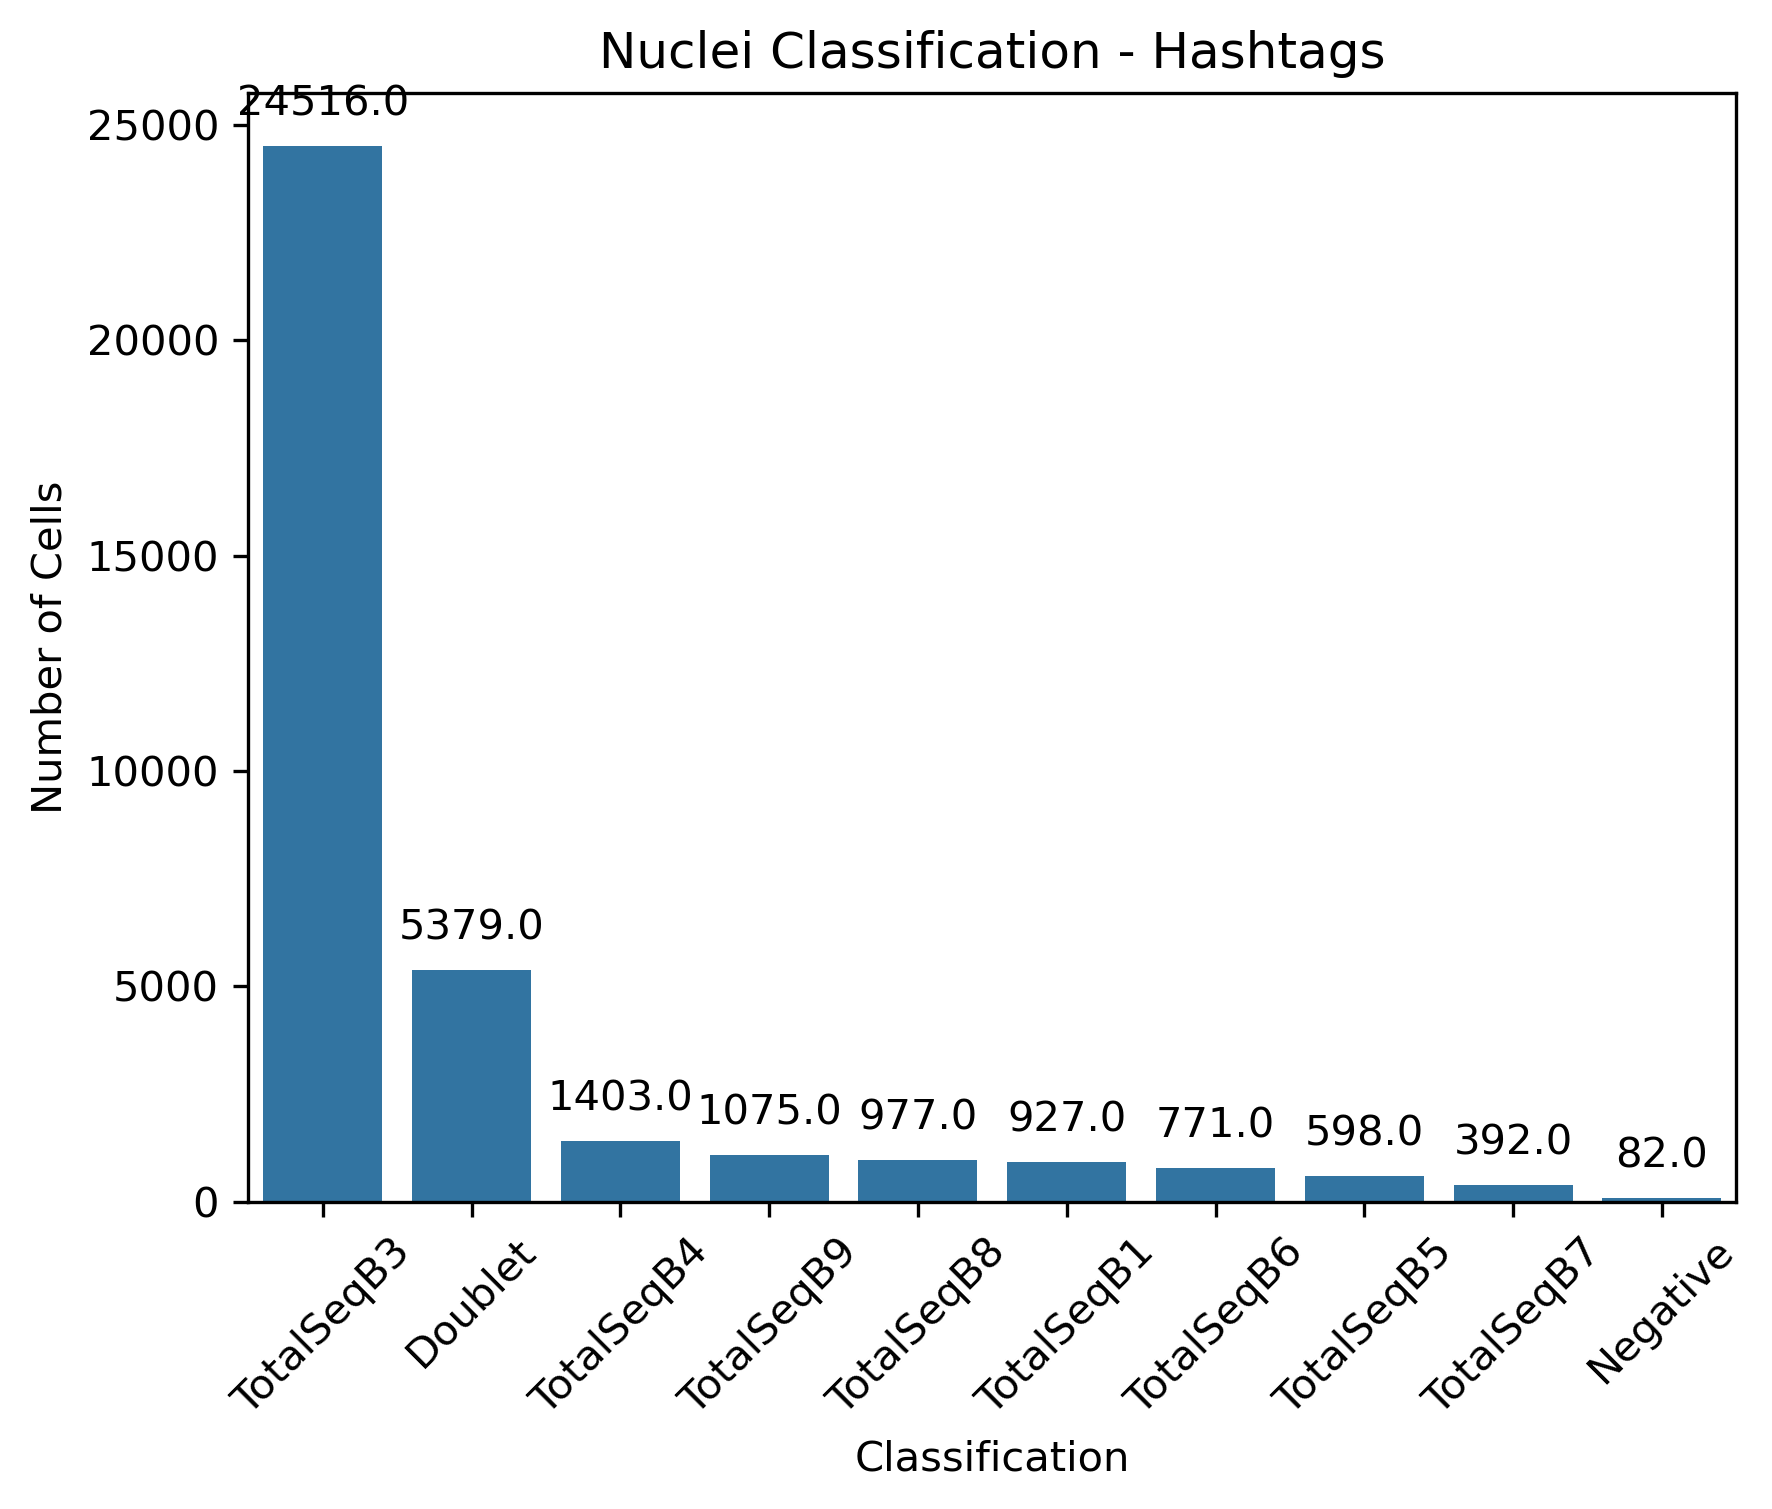

In [50]:
ax = sb.countplot(data=filtered_object.obs, x='Classification', order=filtered_object.obs['Classification'].value_counts().index)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 10), textcoords='offset points')

plt.title("Nuclei Classification - Hashtags")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel("Classification")
plt.ylabel("Number of Cells")
plt.show()

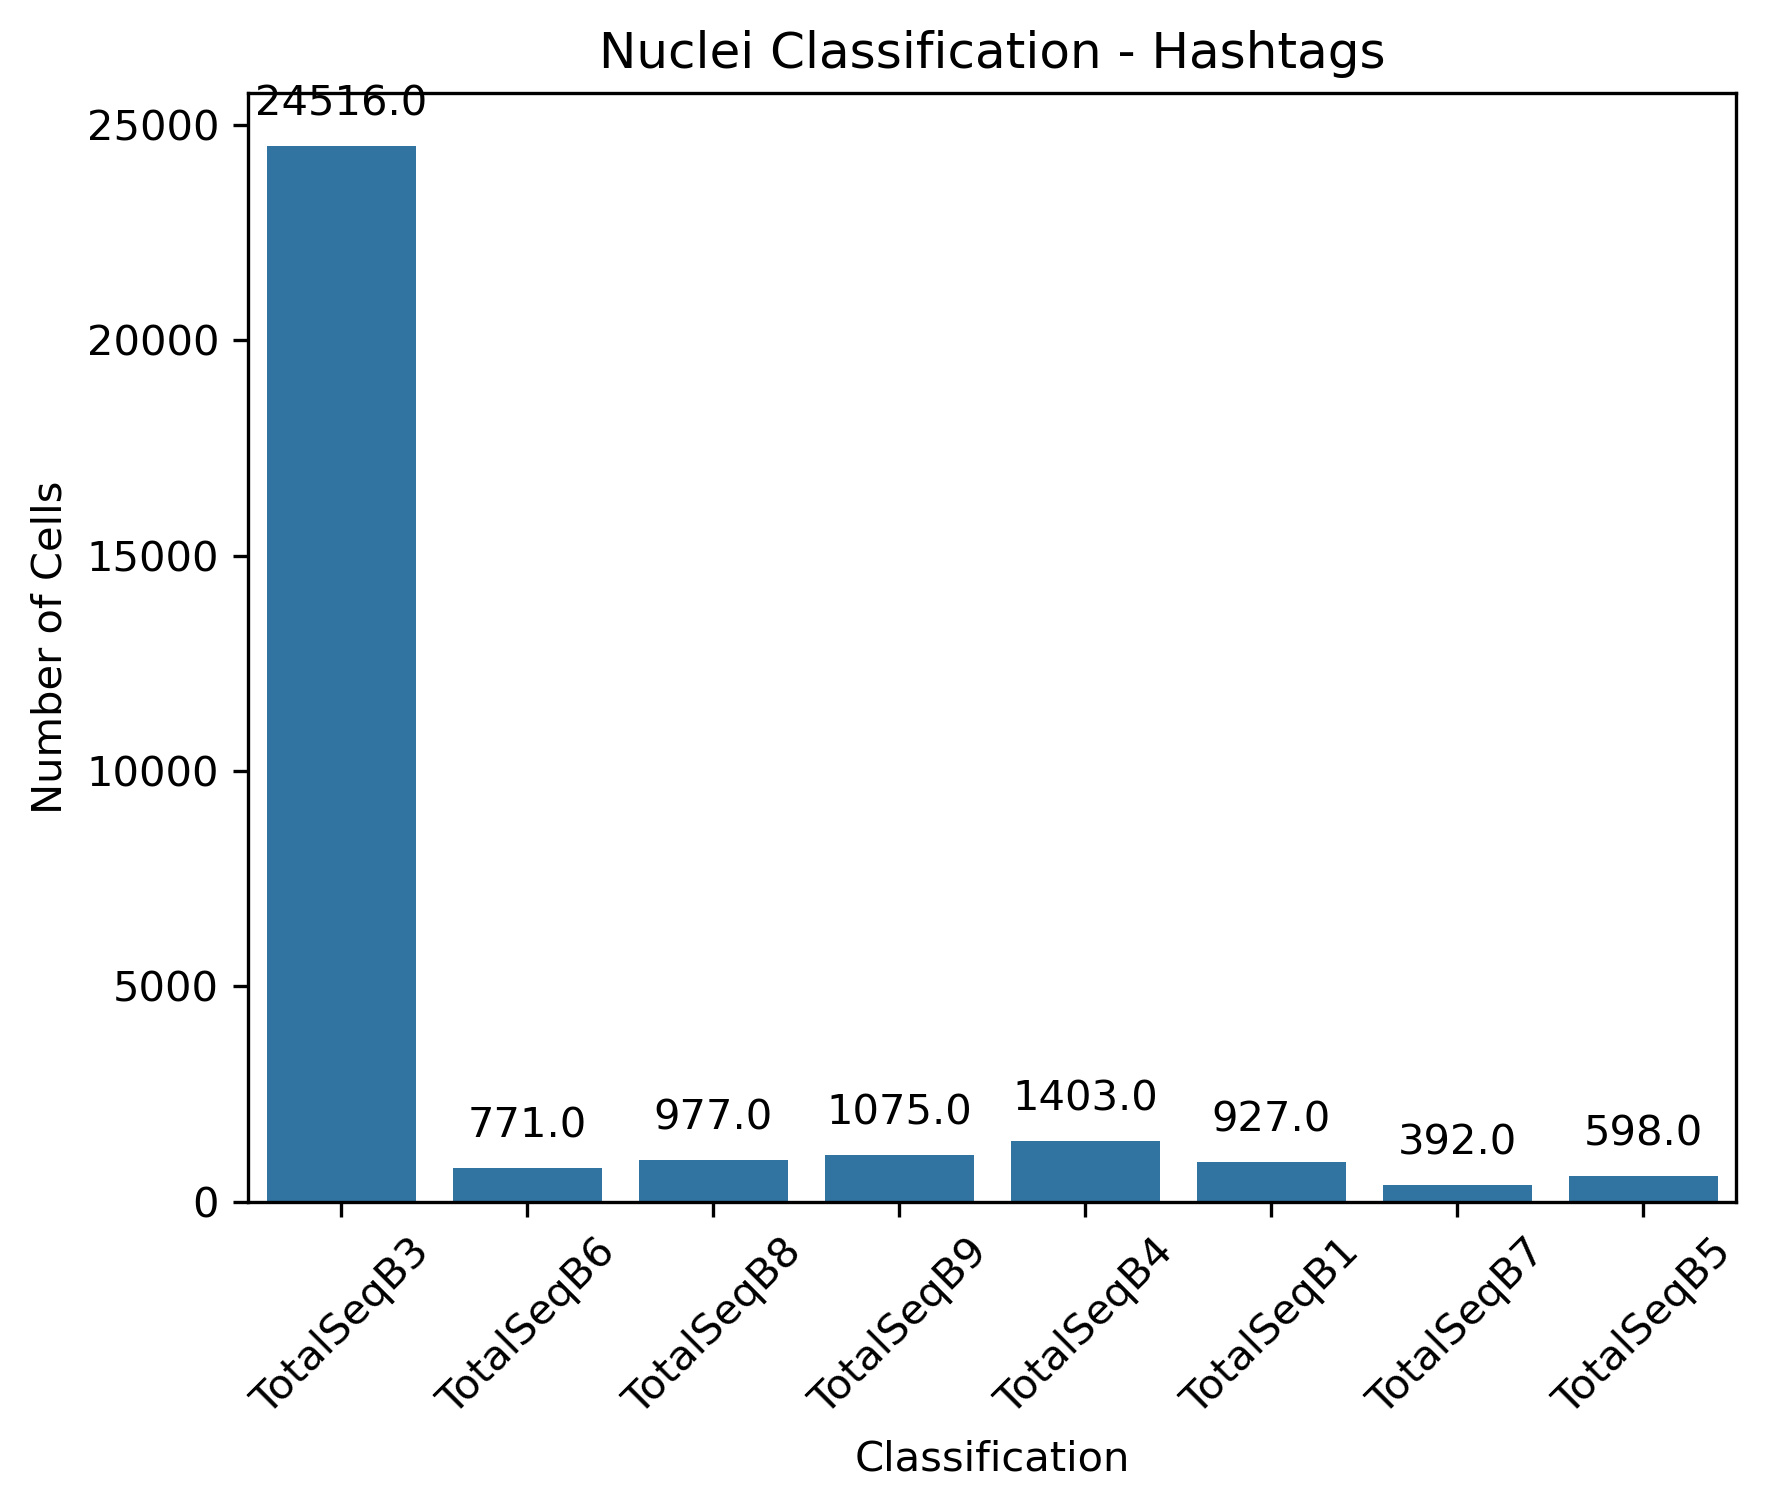

In [51]:
without_doublets = filtered_object[~filtered_object.obs['Classification'].isin(['Doublet', 'Negative'])]

ax = sb.countplot(data=without_doublets.obs, x='Classification')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 10), textcoords='offset points')

plt.title("Nuclei Classification - Hashtags")
plt.xticks(rotation=45) 
plt.xlabel("Classification")
plt.ylabel("Number of Cells")
plt.show()

In [52]:
mapping_dict = {
    "TotalSeqB1" : "Singlet" ,
    "TotalSeqB3" : "Singlet" ,
    "TotalSeqB4" : "Singlet" ,
    "TotalSeqB5" : "Singlet" ,
    "TotalSeqB6" : "Singlet" ,
    "TotalSeqB7" : "Singlet" ,
    "TotalSeqB8" : "Singlet" ,
    "TotalSeqB9" : "Singlet" ,
    "Doublet" : "Doublet" ,
    "Negative" : "Negative"
}

filtered_object.obs['Broad_Classification'] = filtered_object.obs['Classification'].replace(mapping_dict)
filtered_object.obs

,assigned_hashtag,Sample,Sample-ID,Mouse-ID,Sex,Group,Ref hashtag,Nuclei Purification Method after Hashing,doublet_scores,predicted_doublets,...,TotalSeqB8,TotalSeqB9,Assigned_Hashtag,most_likely_hypothesis,cluster_feature,negative_hypothesis_probability,singlet_hypothesis_probability,doublet_hypothesis_probability,Classification,Broad_Classification
AAACCAAAGCCAGTGT-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,0.121137,False,...,214.0,335.0,NaN,1.0,2,1.787635e-03,0.652682,3.455306e-01,TotalSeqB3,Singlet
AAACCAAAGGCGTCCA-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,0.133245,False,...,255.0,243.0,NaN,1.0,2,6.396750e-05,0.990181,9.755249e-03,TotalSeqB3,Singlet
AAACCAAAGGTTAGCC-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,0.081367,False,...,243.0,189.0,NaN,1.0,8,3.841985e-09,1.000000,1.504425e-12,TotalSeqB3,Singlet
AAACCAAAGTACCACA-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,0.038397,False,...,231.0,207.0,NaN,1.0,7,1.971289e-04,0.956791,4.301152e-02,TotalSeqB3,Singlet
AAACCAAAGTAGCCGT-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,0.098060,False,...,228.0,189.0,NaN,1.0,7,1.610440e-04,0.960353,3.948640e-02,TotalSeqB3,Singlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTGTTAGTTTGCATA-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,0.038952,False,...,201.0,157.0,NaN,1.0,5,6.403809e-09,0.831566,1.684344e-01,TotalSeqB3,Singlet
TGTGTTGAGCCAGAGA-1,Hash9,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_11,11,26-2457,Male,MCMV,TotalSeqB9,Standard,0.111688,False,...,739.0,4683.0,NaN,1.0,11,8.643097e-14,0.999540,4.603331e-04,TotalSeqB9,Singlet
TGTGTTGAGCTAACCA-1,Hash4,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13,13,#5_DZHI_12.07.2023,Male,MCMV,TotalSeqB4,Magnetic Beads,0.246512,False,...,229.0,186.0,NaN,1.0,2,7.167717e-03,0.787284,2.055487e-01,TotalSeqB4,Singlet
TGTGTTGAGGAGGACC-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,0.047445,False,...,136.0,109.0,NaN,0.0,1,6.263381e-01,0.373662,8.858931e-14,Negative,Negative


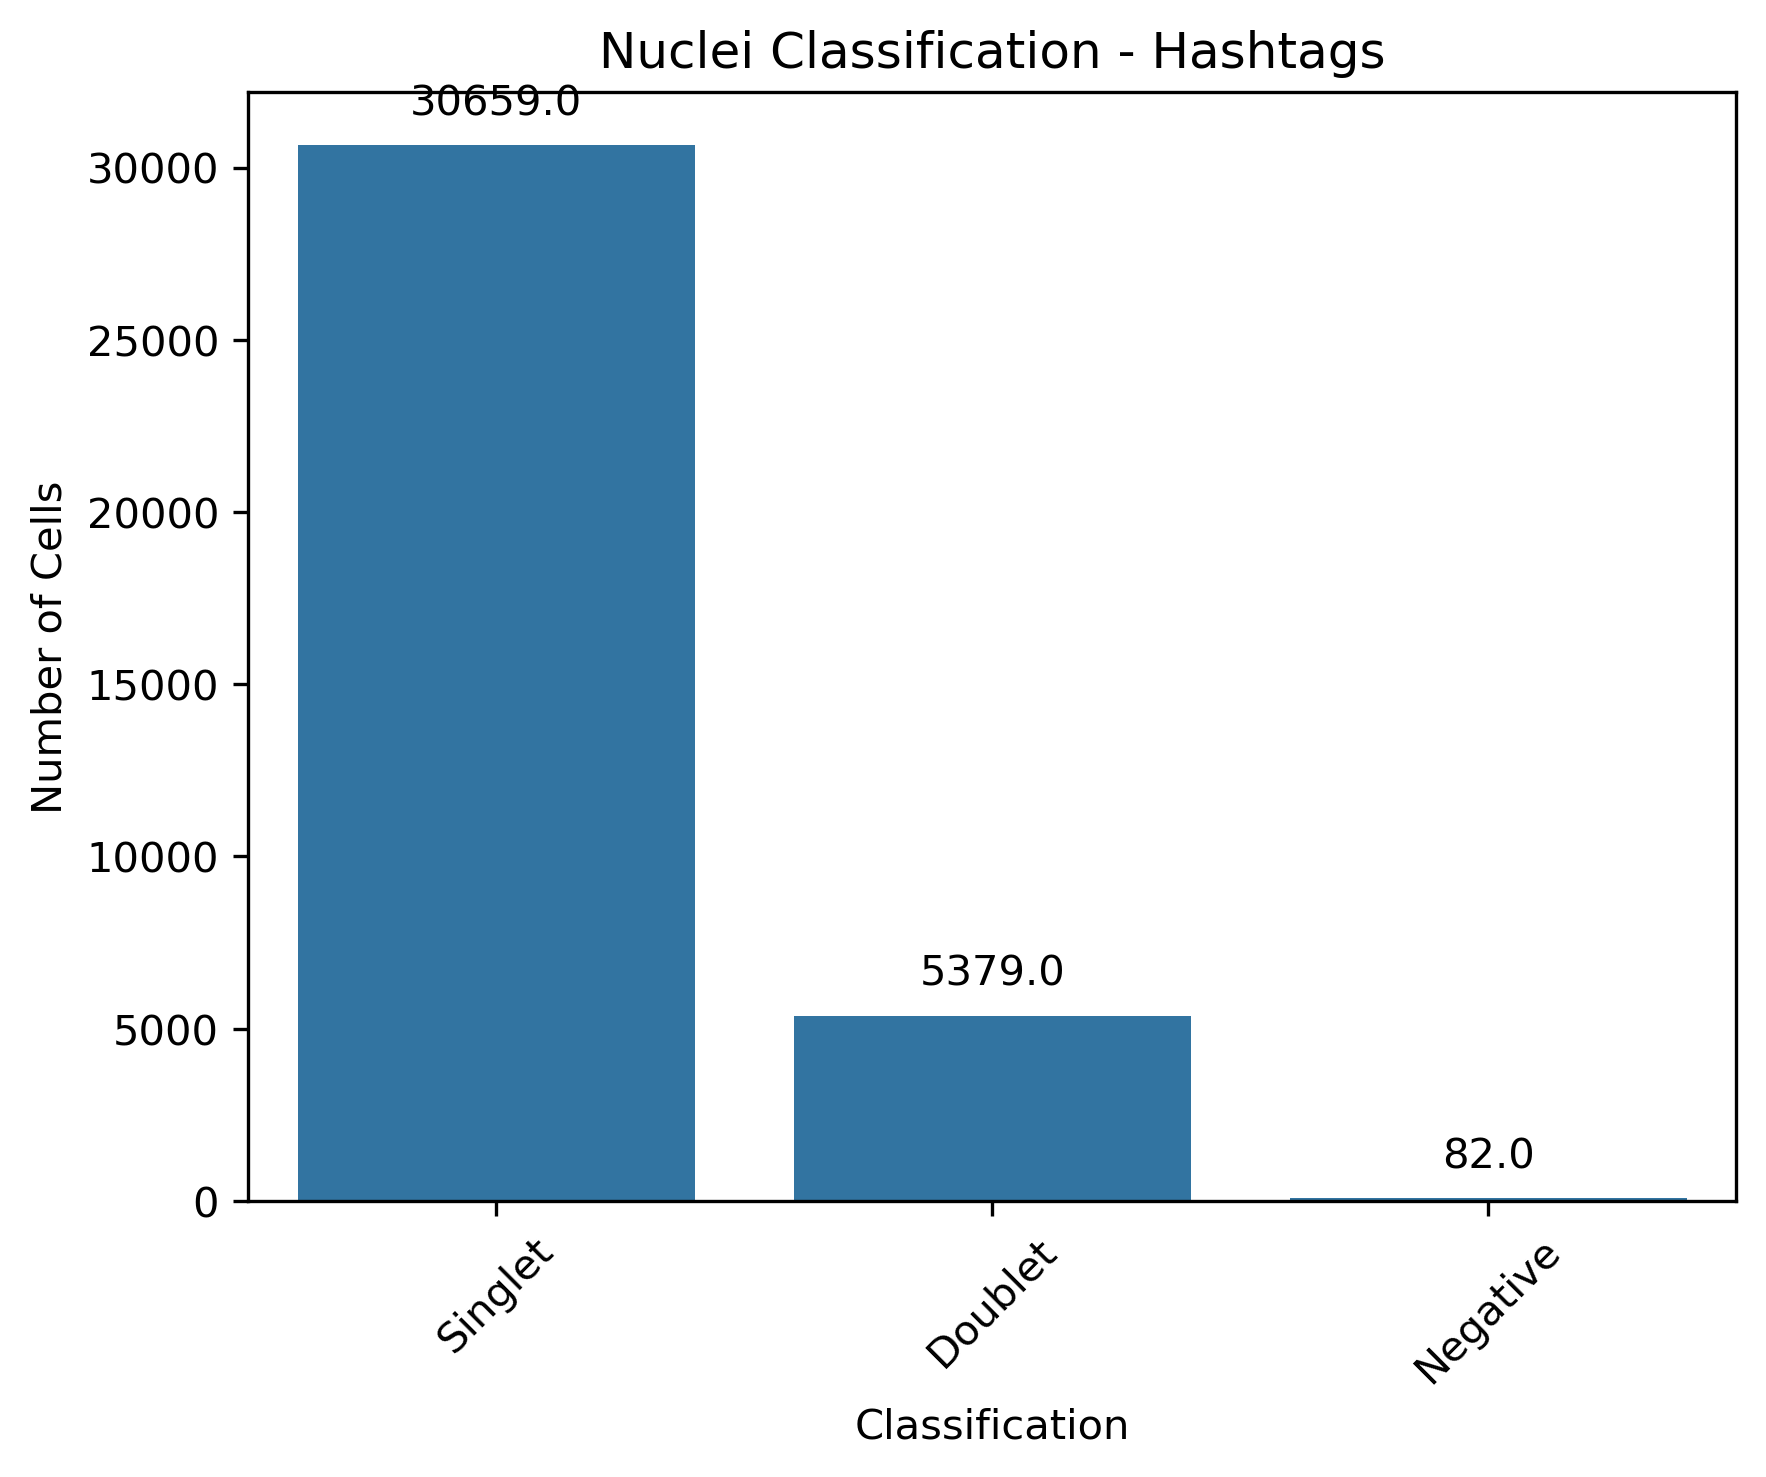

In [53]:
ax = sb.countplot(data=filtered_object.obs, x='Broad_Classification')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 10), textcoords='offset points')

plt.title("Nuclei Classification - Hashtags")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel("Classification")
plt.ylabel("Number of Cells")
plt.show()

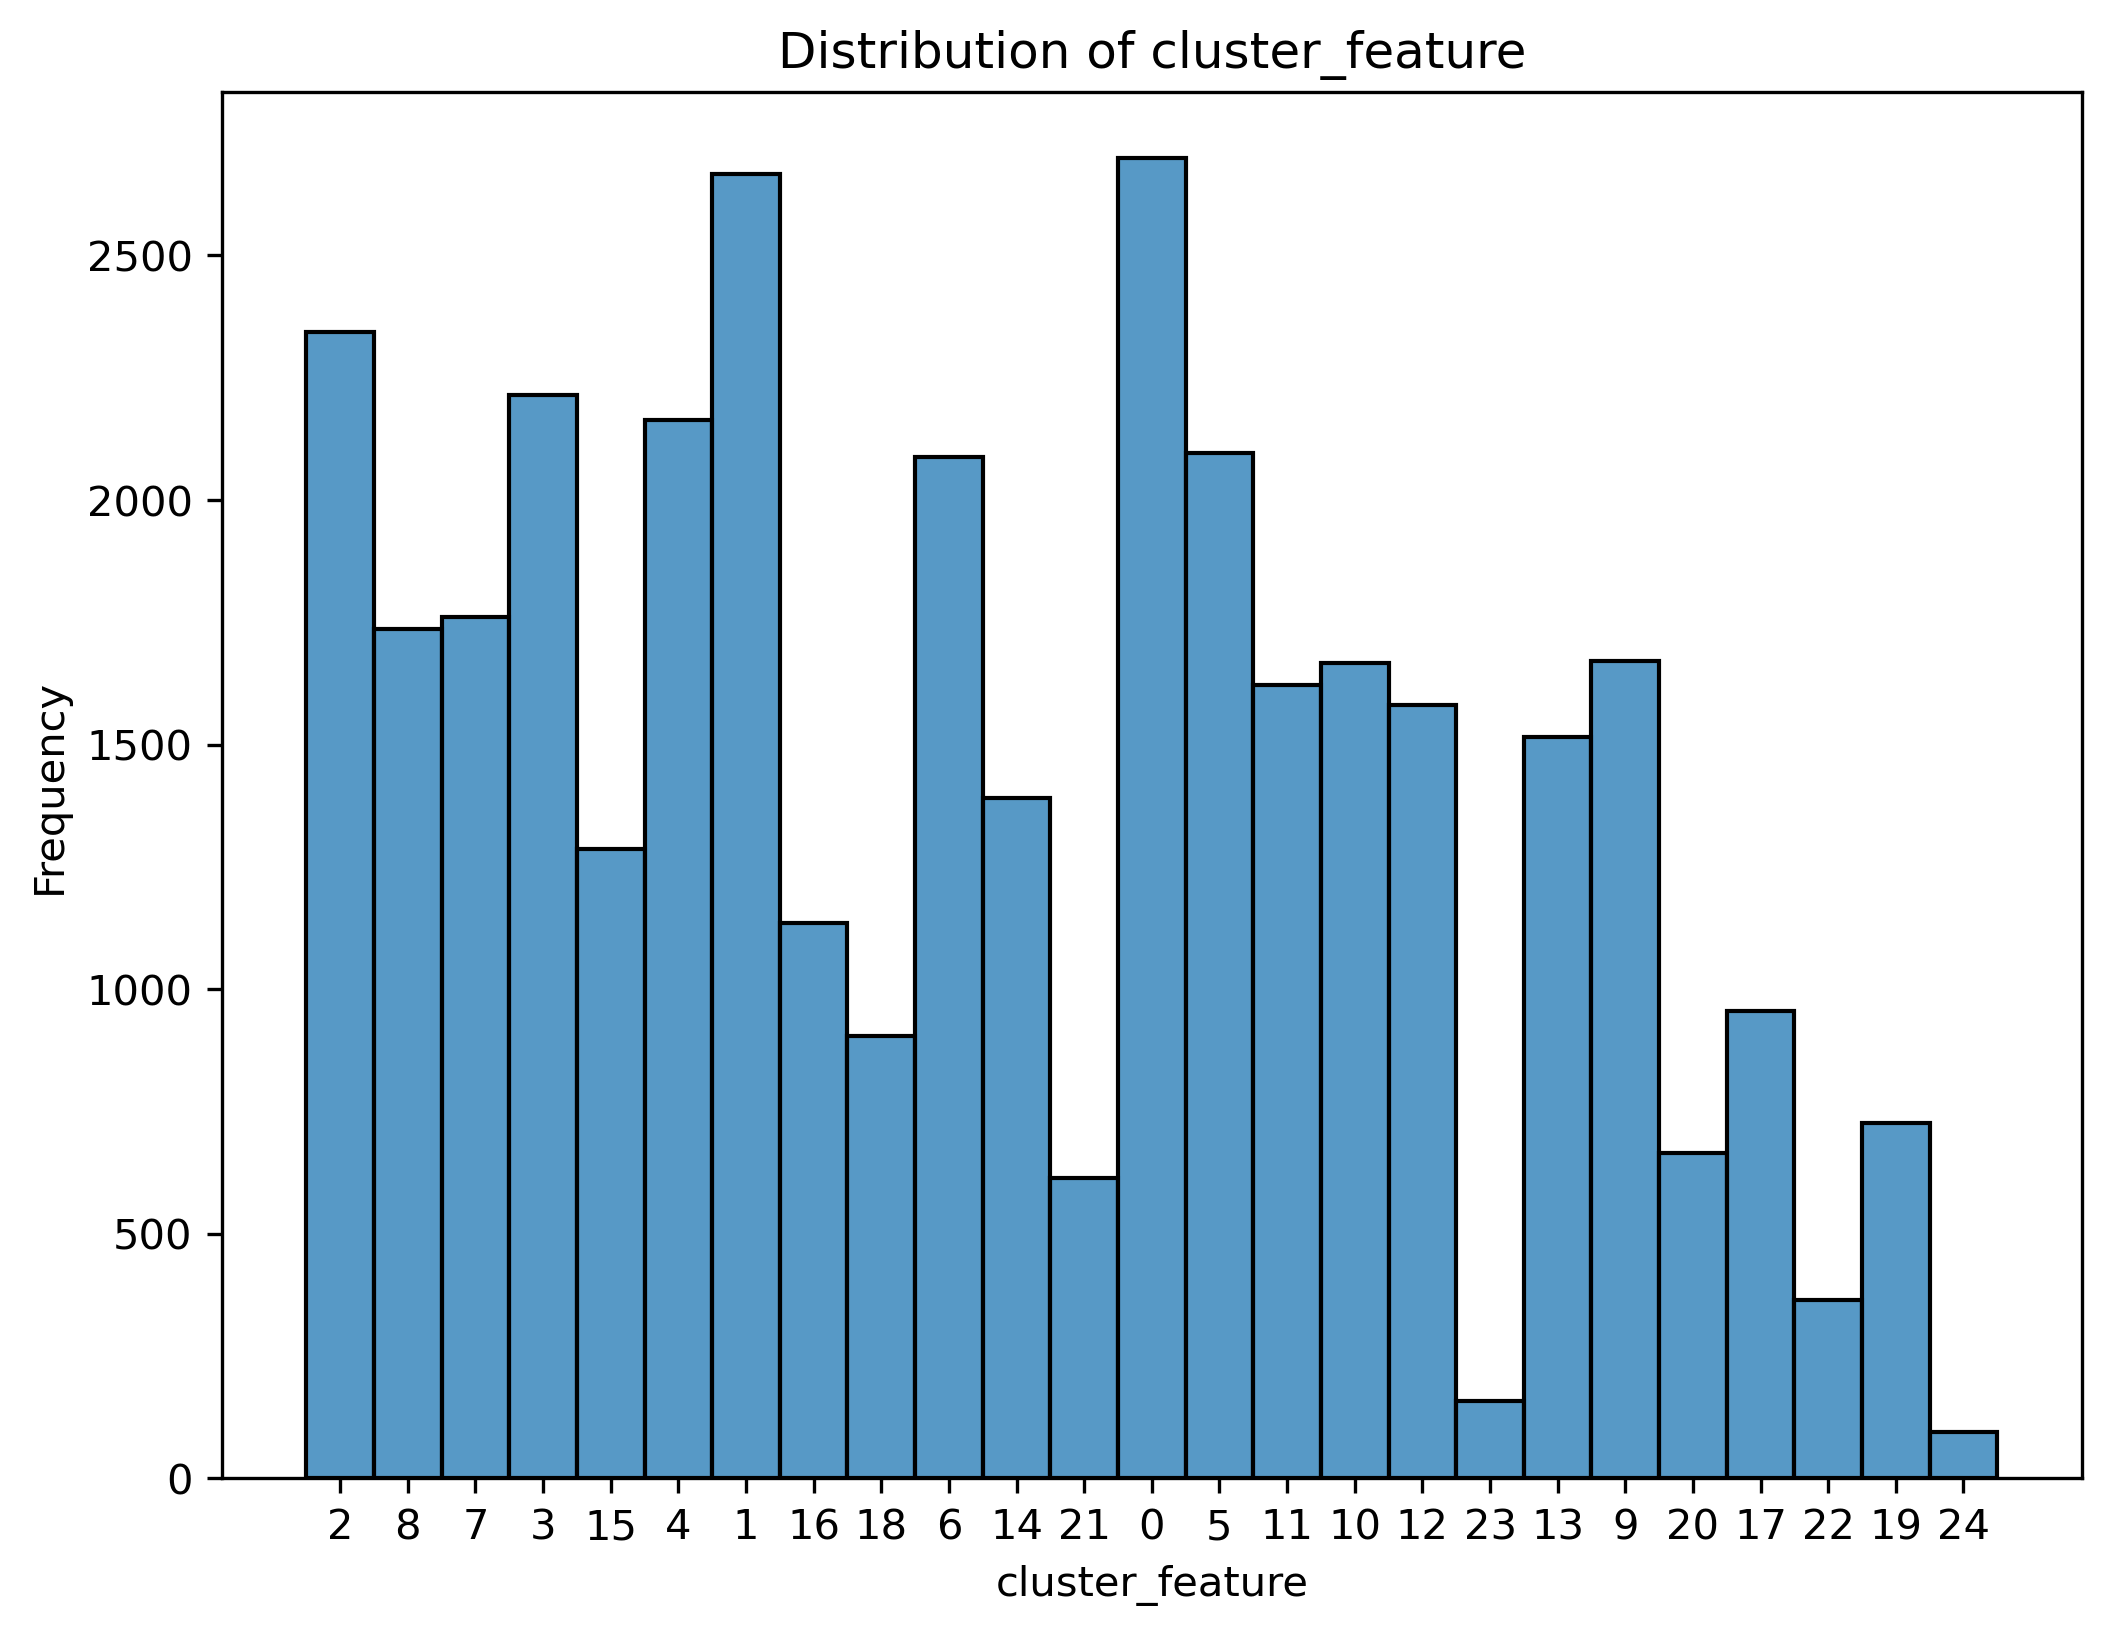

In [54]:
plt.figure(figsize=(8, 6))
sb.histplot(filtered_object.obs['cluster_feature'])
plt.title("Distribution of cluster_feature")
plt.xlabel("cluster_feature")
plt.ylabel("Frequency")
plt.show()

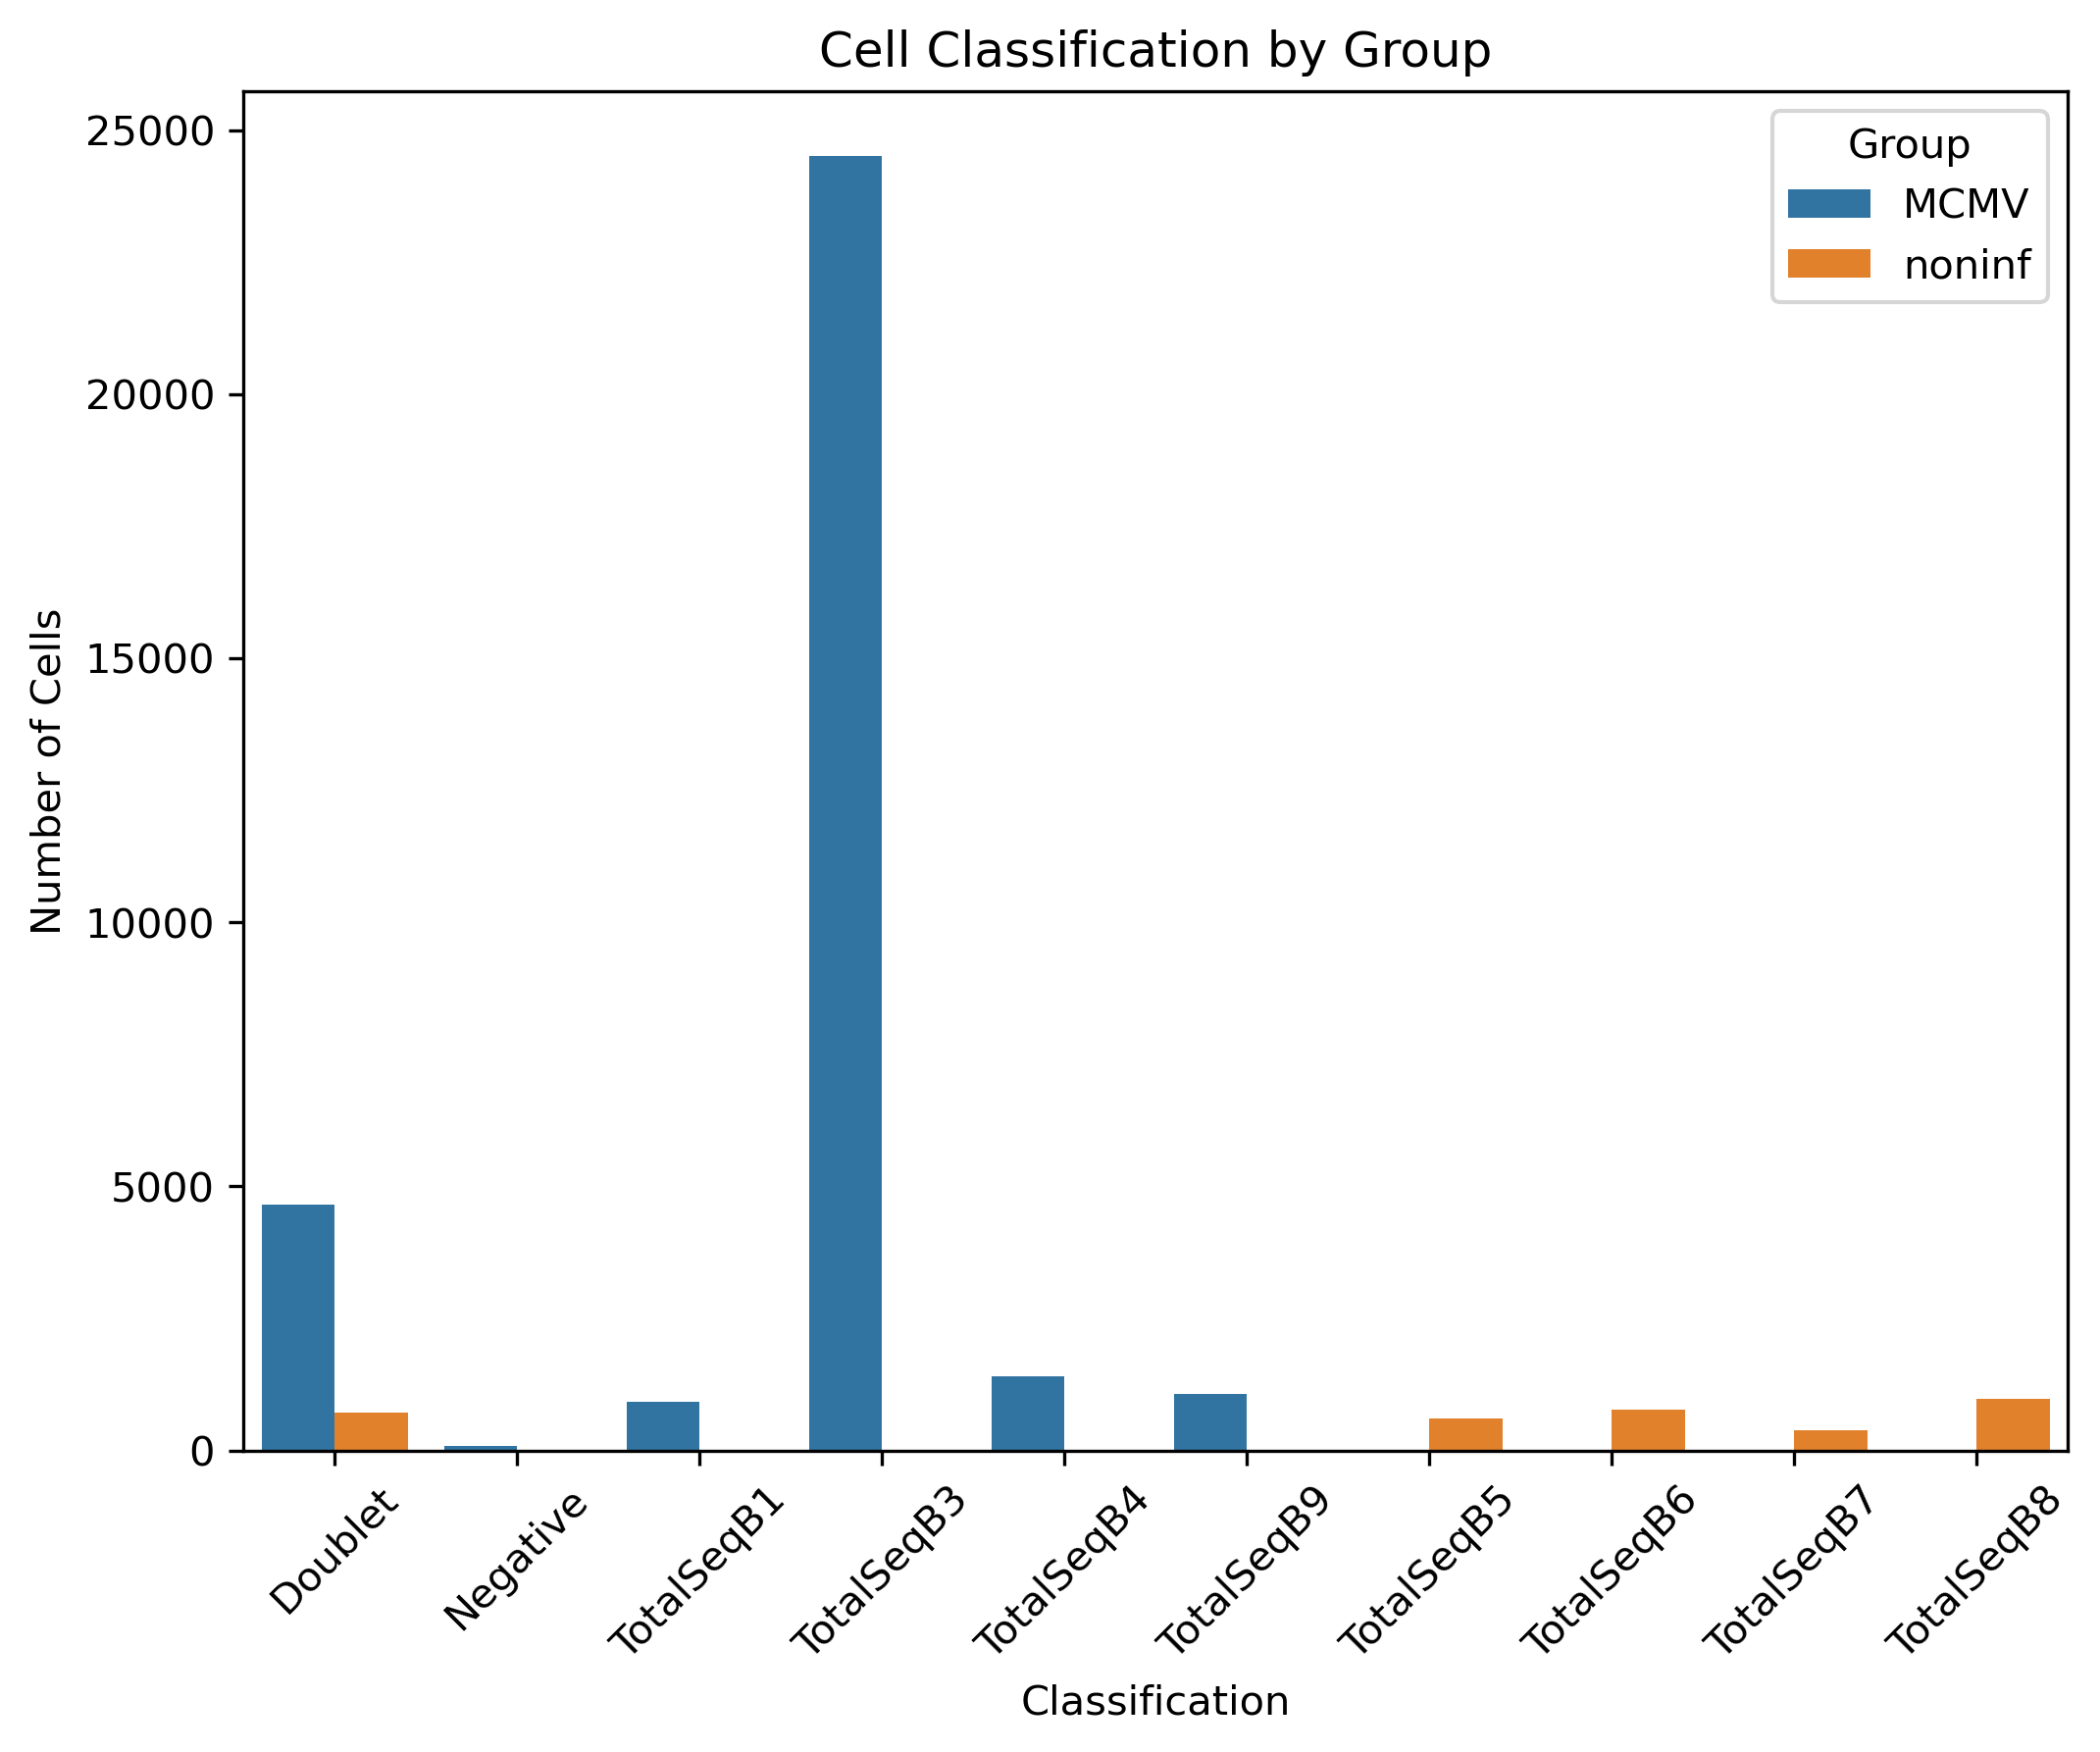

In [55]:
plt.figure(figsize=(8, 6))
sb.countplot(data=filtered_object.obs, x='Classification', hue='Group',order= ['Doublet','Negative', 'TotalSeqB1','TotalSeqB3','TotalSeqB4','TotalSeqB9','TotalSeqB5','TotalSeqB6','TotalSeqB7','TotalSeqB8'])
plt.title("Cell Classification by Group")
plt.xlabel("Classification")
plt.ylabel("Number of Cells")
plt.xticks(rotation=45)
plt.show()

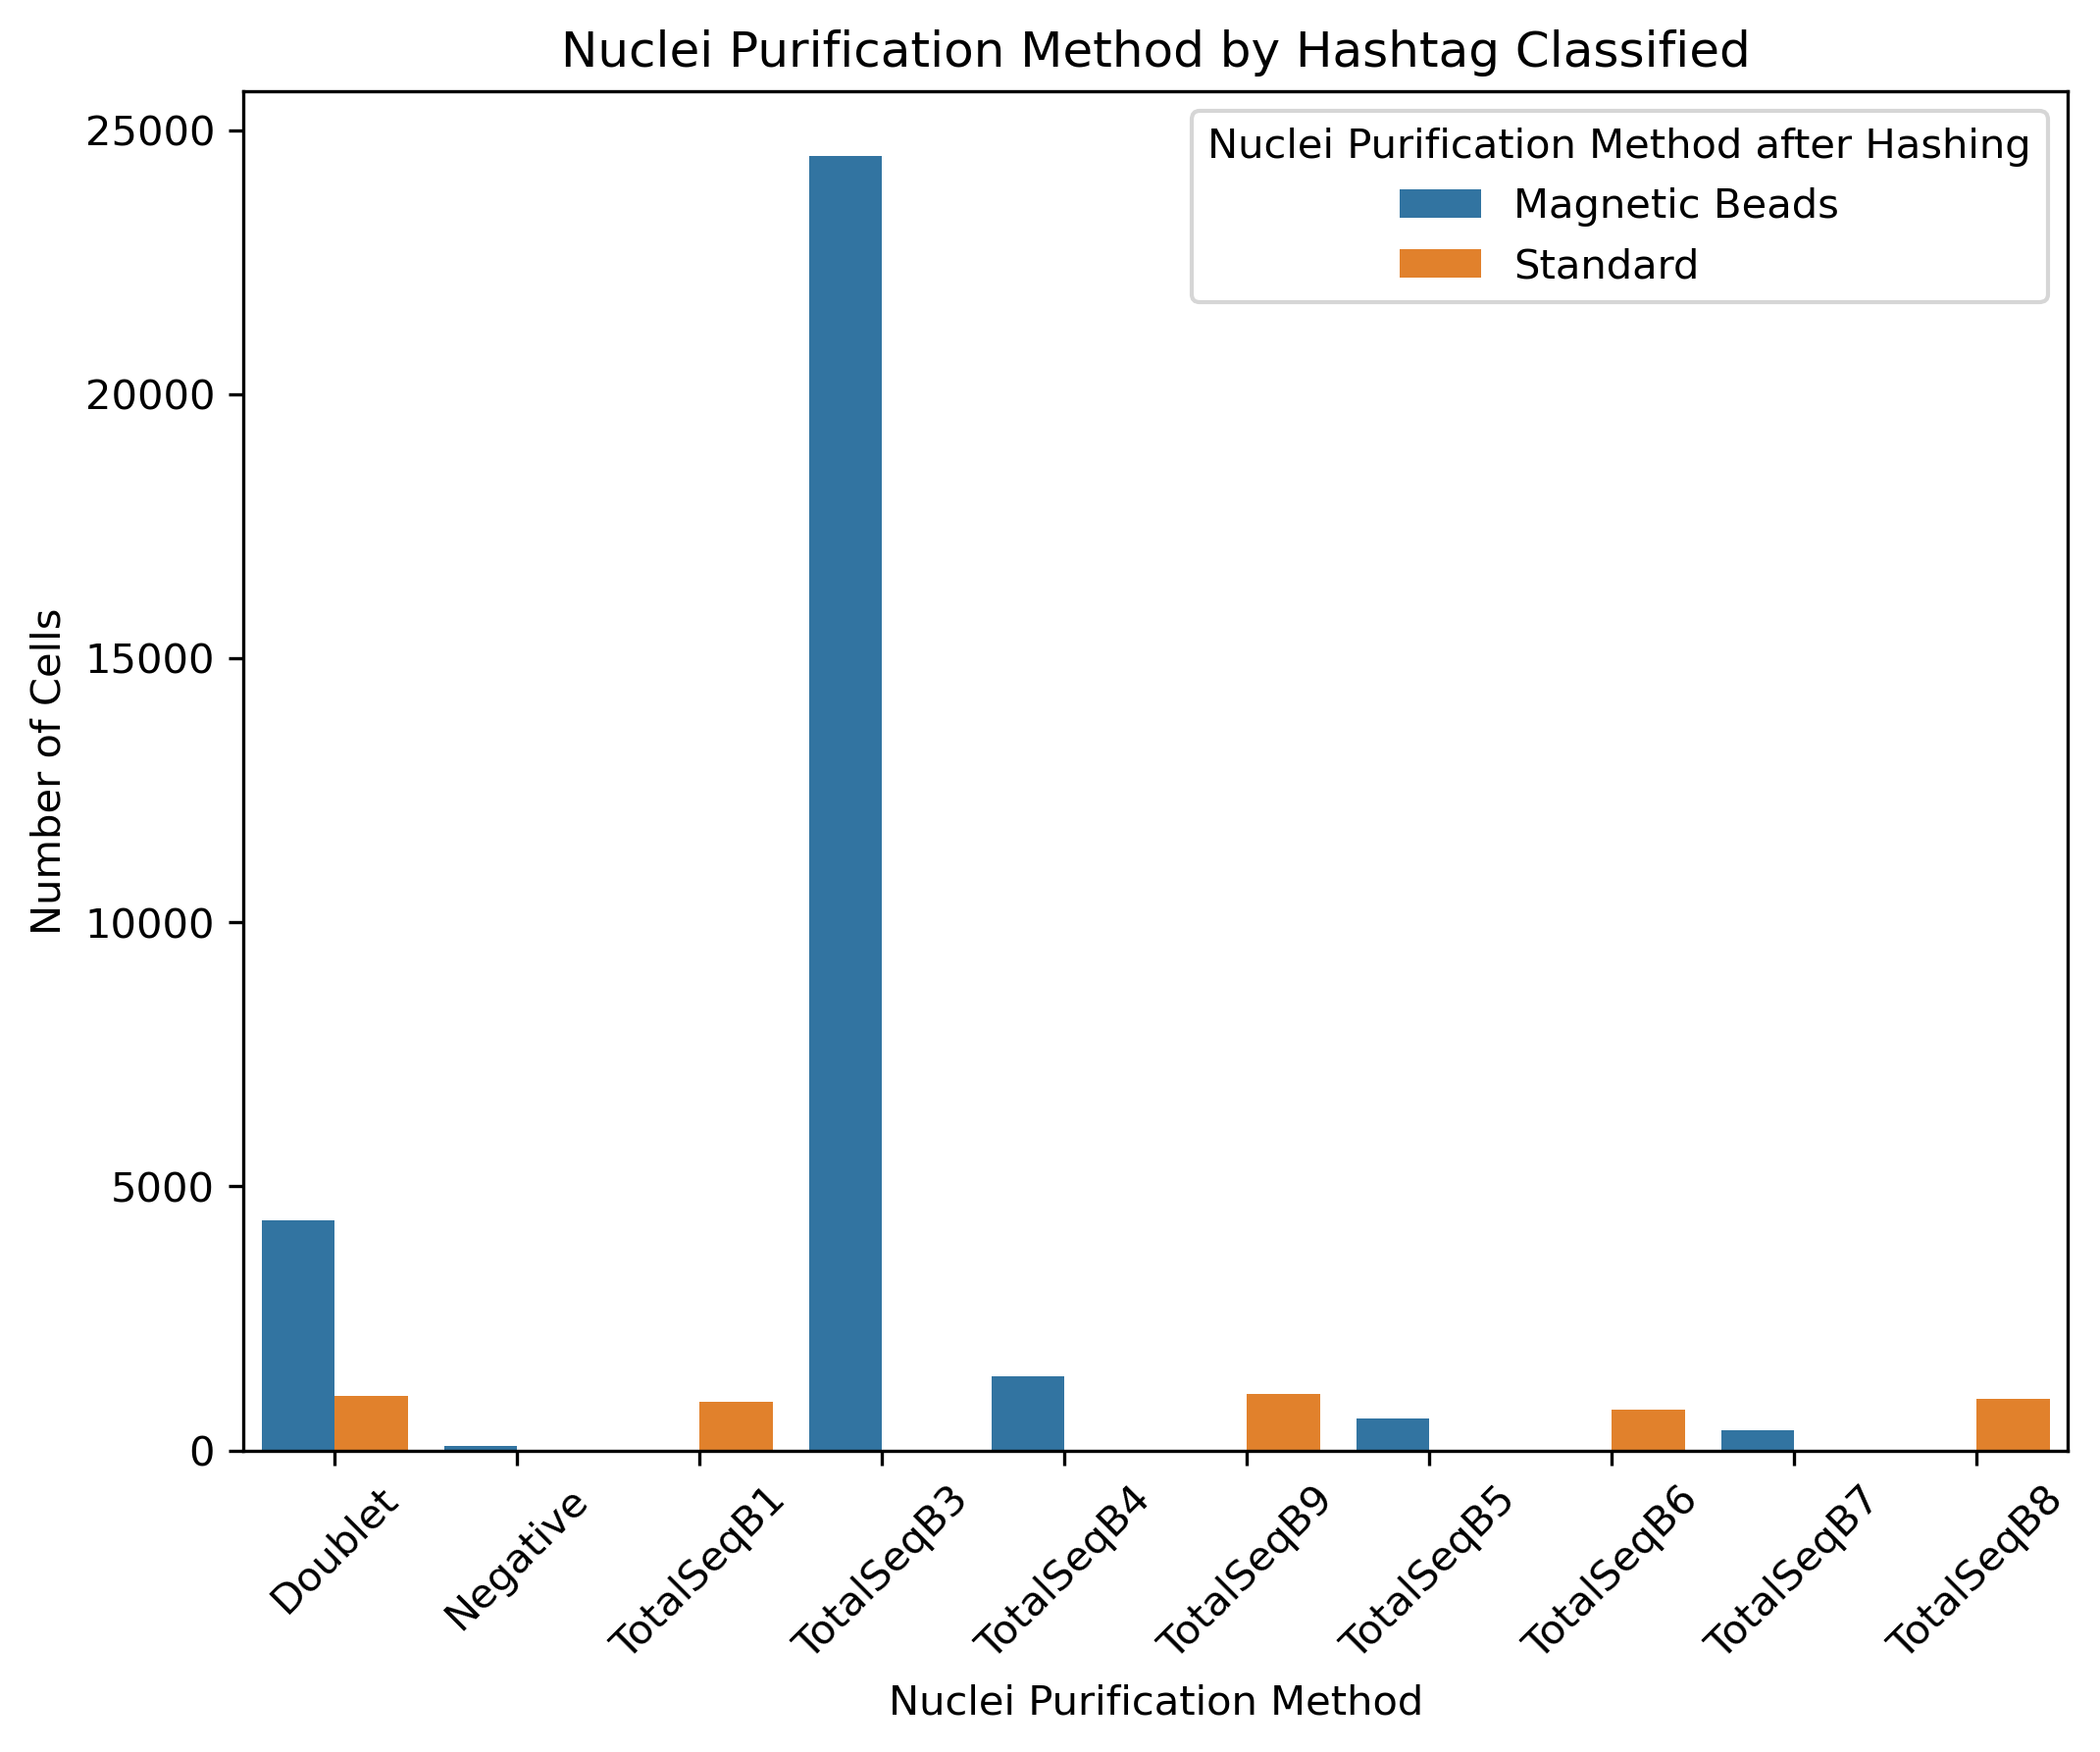

In [56]:
plt.figure(figsize=(8, 6))
sb.countplot(data=filtered_object.obs, hue='Nuclei Purification Method after Hashing', x='Classification', order= ['Doublet','Negative', 'TotalSeqB1','TotalSeqB3','TotalSeqB4','TotalSeqB9','TotalSeqB5','TotalSeqB6','TotalSeqB7','TotalSeqB8'])
plt.title("Nuclei Purification Method by Hashtag Classified")
plt.xlabel("Nuclei Purification Method")
plt.ylabel("Number of Cells")
plt.xticks(rotation=45)
plt.show()

## Data Export

In [57]:
filtered_object.obs.dtypes

assigned_hashtag                              object
Sample                                        object
Sample-ID                                      int64
Mouse-ID                                      object
Sex                                           object
Group                                         object
Ref hashtag                                   object
Nuclei Purification Method after Hashing      object
doublet_scores                               float64
predicted_doublets                            object
n_genes_by_counts                              int64
total_counts                                 float32
total_counts_mt                              float32
pct_counts_mt                                float32
total_counts_ribo                            float32
pct_counts_ribo                              float32
leiden                                      category
TotalSeqB1                                   float32
TotalSeqB3                                   f

In [58]:
filtered_object.obs['predicted_doublets'] = raw_adata.obs['predicted_doublets'].astype(int)

In [59]:
filtered_object.write_h5ad(f'../data/demultiplexed_hashsolo_raw_without_scrublet_doublets_{timestamp}.h5ad')